In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
from mpl_toolkits.basemap import Basemap

import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag


%matplotlib inline
%config InlineBackend.figure_formats = {'retina',}

In [4]:
gauss_coef = pd.read_csv('gauss_coefs2.dat', skiprows=2, delim_whitespace=True, dtype=float)

In [5]:
gauss_coef = gauss_coef.ix[gauss_coef['t_step']>2601000.]

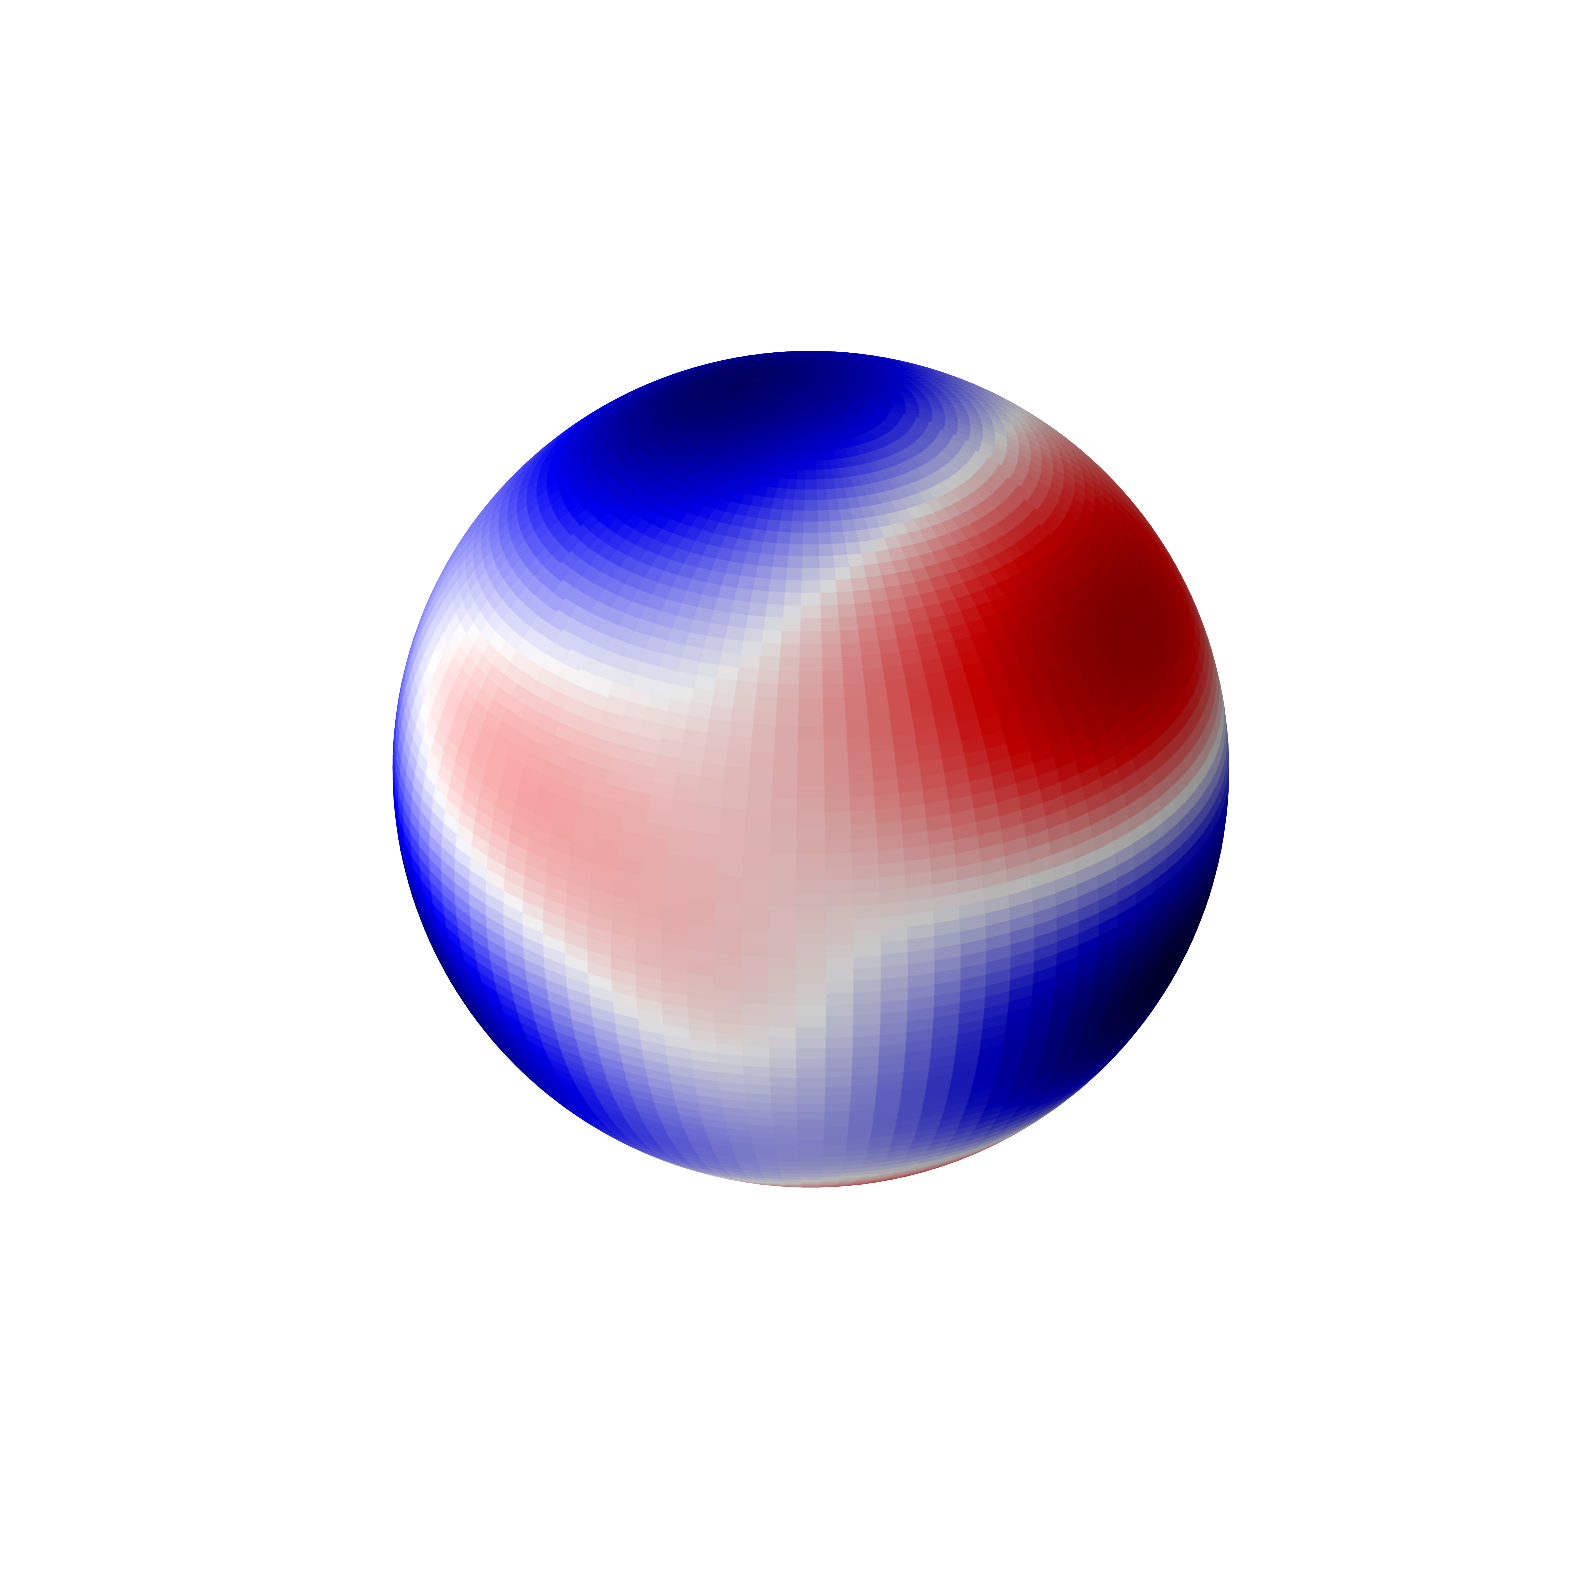

In [6]:
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

try:
    del fcolors
except:
    pass

for (l, m) in [(1, 1), (2, 2), (2, 1), (2, 0), (3, 3), (3, 2), (3, 1), (3, 0)]:#, (1, 0)
    g_coef = gauss_coef['g{0}_{1}'.format(l, m)].tolist()
    try:
        h_coef = gauss_coef['h{0}_{1}'.format(l, m)].tolist()
    except:
        h_coef = [0]*len(g_coef)
    try:
        fcolors += (g_coef[0]*np.cos(m*phi)+h_coef[0]*np.sin(m*phi))*sph_harm(m, l, theta, phi).real
    except:
        fcolors = (g_coef[0]*np.cos(m*phi)+h_coef[0]*np.sin(m*phi))*sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# Turn off the axis planes
ax.set_axis_off()
# plt.title('m={0}, n={1}'.format(m,l), fontsize='x-large', position=(0.5,0.86))
plt.tight_layout()
# plt.savefig('sph_harm_m{0}_n{1}.pdf'.format(m,l))
plt.show()

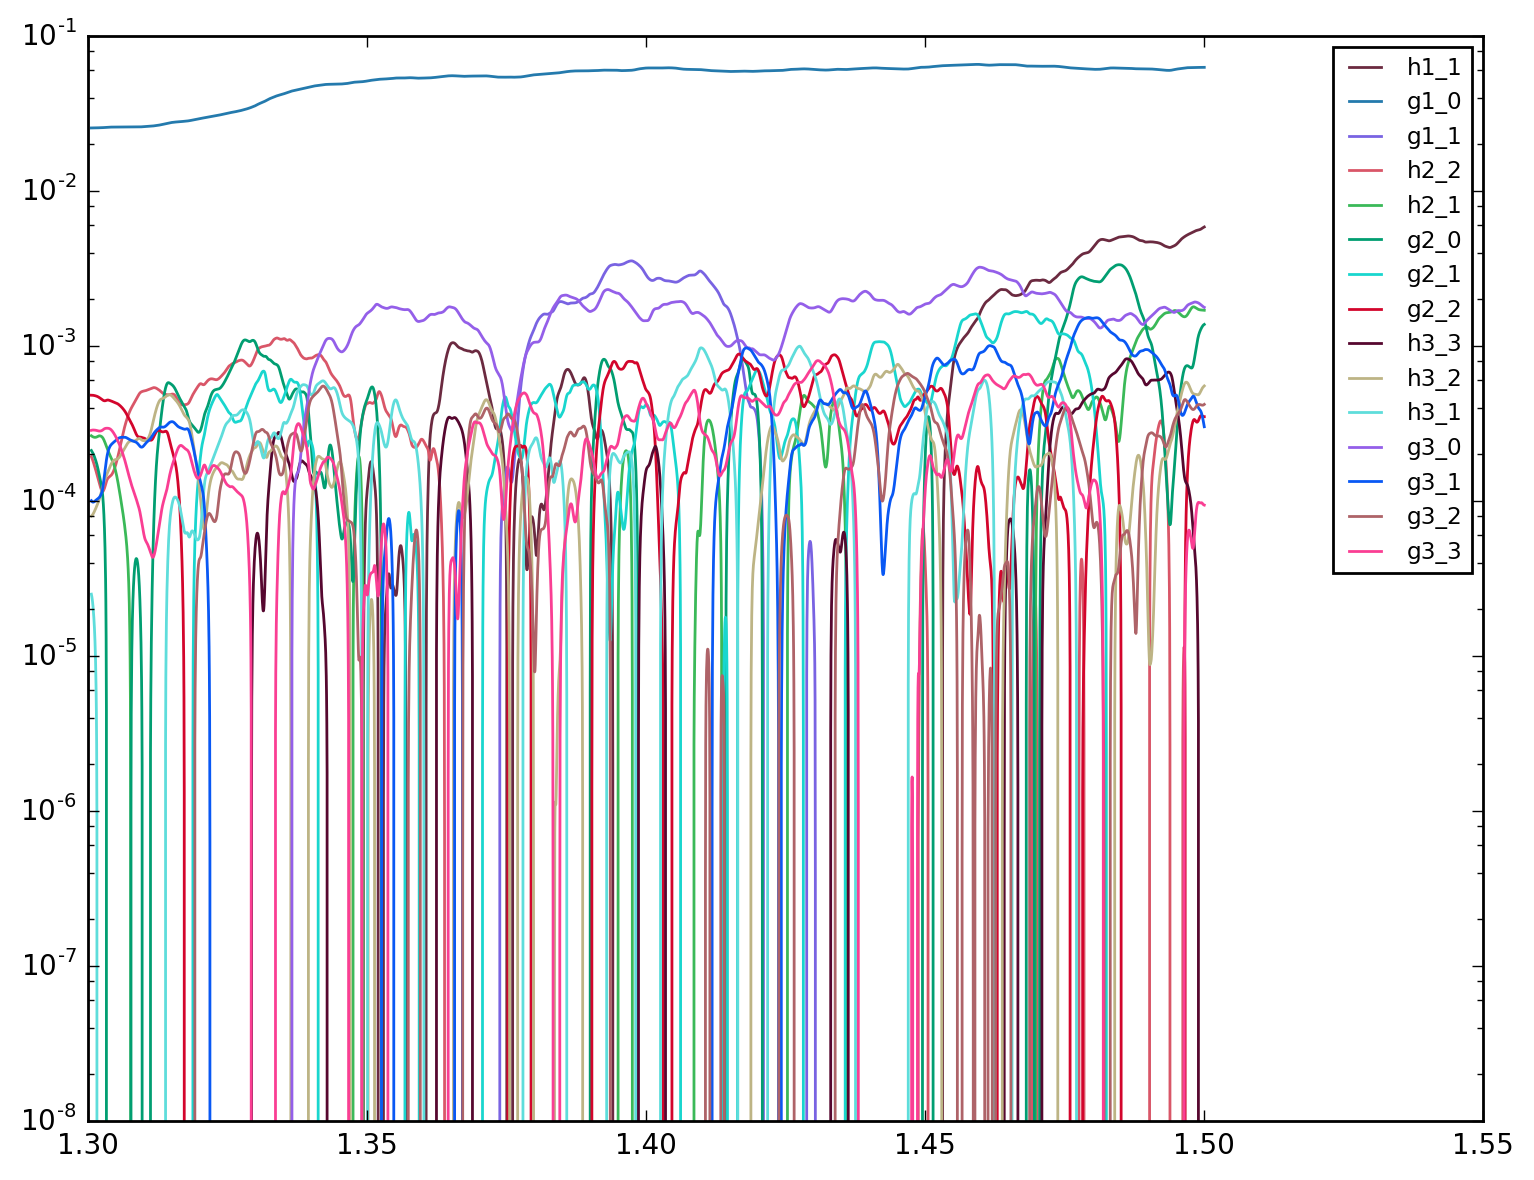

In [7]:
plt.figure(figsize=(9,7))
for column in gauss_coef.columns[2:].tolist():
    plt.plot(gauss_coef.time.tolist(), gauss_coef[column].tolist(), c = np.random.rand(3), label=column)
plt.legend(fontsize='small')
plt.yscale('log')
# plt.xlim(gauss_coef.time.min(), gauss_coef.time.max())
plt.savefig('gauss_coef_plot.pdf')
plt.show()

In [8]:
gauss_coef

t_step     time      h1_1      g1_0      g1_1      h2_2      h2_1  \
1030  2601100.0  1.30055 -0.000164  0.025473 -0.000672  0.000193  0.000263   
1031  2601200.0  1.30060 -0.000164  0.025477 -0.000672  0.000191  0.000262   
1032  2601300.0  1.30065 -0.000165  0.025481 -0.000673  0.000189  0.000261   
1033  2601400.0  1.30070 -0.000165  0.025485 -0.000673  0.000187  0.000261   
1034  2601500.0  1.30075 -0.000165  0.025489 -0.000674  0.000185  0.000260   
1035  2601600.0  1.30080 -0.000166  0.025492 -0.000674  0.000183  0.000259   
1036  2601700.0  1.30085 -0.000167  0.025495 -0.000675  0.000181  0.000259   
1037  2601800.0  1.30090 -0.000167  0.025498 -0.000676  0.000178  0.000258   
1038  2601900.0  1.30095 -0.000168  0.025501 -0.000676  0.000176  0.000258   
1039  2602000.0  1.30100 -0.000169  0.025504 -0.000677  0.000174  0.000258   
1040  2602100.0  1.30105 -0.000170  0.025506 -0.000678  0.000171  0.000257   
1041  2602200.0  1.30110 -0.000171  0.025509 -0.000680  0.000169  0.000257   
1042  2602300.0  1.30115 -0.000171  0.025511 -0.000681  0.000167  0.000257   
1043  2602400.0  1.30120 -0.000172  0.025513 -0.000682  0.000165  0.000257   
1044  2602500.0  1.30125 -0.000173  0.025515 -0.000683  0.000162  0.000257   
1045  2602600.0  1.30130 -0.000173  0.025517 -0.000685  0.000160  0.000257   
1046  2602700.0  1.30135 -0.000173  0.025519 -0.000686  0.000158  0.000257   
1047  2602800.0  1.30140 -0.000174  0.025520 -0.000687  0.000155  0.000258   
1048  2602900.0  1.30145 -0.000174  0.025522 -0.000688  0.000153  0.000258   
1049  2603000.0  1.30150 -0.000174  0.025524 -0.000690  0.000150  0.000258   
1050  2603100.0  1.30155 -0.000175  0.025525 -0.000691  0.000148  0.000259   
1051  2603200.0  1.30160 -0.000175  0.025527 -0.000692  0.000146  0.000259   
1052  2603300.0  1.30165 -0.000176  0.025528 -0.000694  0.000143  0.000260   
1053  2603400.0  1.30170 -0.000176  0.025530 -0.000695  0.000141  0.000260   
1054  2603500.0  1.30175 -0.000177  0.025532 -0.000696  0.000139  0.000261   
1055  2603600.0  1.30180 -0.000177  0.025534 -0.000698  0.000137  0.000262   
1056  2603700.0  1.30185 -0.000178  0.025536 -0.000699  0.000135  0.000262   
1057  2603800.0  1.30190 -0.000179  0.025538 -0.000700  0.000133  0.000262   
1058  2603900.0  1.30195 -0.000179  0.025540 -0.000702  0.000131  0.000263   
1059  2604000.0  1.30200 -0.000180  0.025543 -0.000703  0.000129  0.000263   
...         ...      ...       ...       ...       ...       ...       ...   
4990  2997100.0  1.49855  0.005545  0.062571 -0.001485 -0.000372  0.001752   
4991  2997200.0  1.49860  0.005553  0.062574 -0.001473 -0.000376  0.001747   
4992  2997300.0  1.49865  0.005560  0.062577 -0.001460 -0.000379  0.001742   
4993  2997400.0  1.49870  0.005567  0.062580 -0.001448 -0.000381  0.001738   
4994  2997500.0  1.49875  0.005572  0.062583 -0.001437 -0.000382  0.001734   
4995  2997600.0  1.49880  0.005578  0.062586 -0.001426 -0.000383  0.001729   
4996  2997700.0  1.49885  0.005583  0.062590 -0.001417 -0.000382  0.001726   
4997  2997800.0  1.49890  0.005588  0.062593 -0.001408 -0.000382  0.001723   
4998  2997900.0  1.49895  0.005594  0.062596 -0.001400 -0.000380  0.001720   
4999  2998000.0  1.49900  0.005599  0.062599 -0.001393 -0.000379  0.001717   
5000  2998100.0  1.49905  0.005605  0.062602 -0.001386 -0.000377  0.001715   
5001  2998200.0  1.49910  0.005612  0.062604 -0.001381 -0.000374  0.001713   
5002  2998300.0  1.49915  0.005619  0.062606 -0.001375 -0.000372  0.001711   
5003  2998400.0  1.49920  0.005627  0.062608 -0.001369 -0.000369  0.001709   
5004  2998500.0  1.49925  0.005636  0.062610 -0.001364 -0.000366  0.001708   
5005  2998600.0  1.49930  0.005647  0.062613 -0.001357 -0.000363  0.001707   
5006  2998700.0  1.49935  0.005658  0.062616 -0.001350 -0.000359  0.001706   
5007  2998800.0  1.49940  0.005671  0.062619 -0.001343 -0.000356  0.001705   
5008  2998900.0  1.49945  0.005684  0.062623 -0.001335 -0.000352  0.001704   
5009  2999000.0  1.49950  0.005

In [9]:
gauss_coef_trimmed = gauss_coef[gauss_coef.columns[1:].tolist()]
gauss_coef_trimmed.set_index('time', inplace=True)

In [10]:
by_pole = pd.DataFrame(columns=['time', 'dipole', 'quadrupole', 'octupole'])

In [11]:
for i in range(len(gauss_coef_trimmed)):
    time_index = gauss_coef_trimmed.index[i]
    by_pole.set_value(i, 'time', time_index)
    by_pole.set_value(i, 
                      'dipole', 
                      np.sqrt((gauss_coef_trimmed.h1_1[time_index])**2 + 
                              (gauss_coef_trimmed.g1_0[time_index])**2 + 
                              (gauss_coef_trimmed.g1_1[time_index])**2))
    by_pole.set_value(i, 
                      'quadrupole', 
                      np.sqrt((gauss_coef_trimmed.h2_2[time_index])**2 + 
                              (gauss_coef_trimmed.h2_1[time_index])**2 + 
                              (gauss_coef_trimmed.g2_0[time_index])**2 + 
                              (gauss_coef_trimmed.g2_1[time_index])**2 + 
                              (gauss_coef_trimmed.g2_2[time_index])**2))
    by_pole.set_value(i, 
                      'octupole', 
                      np.sqrt((gauss_coef_trimmed.h3_3[time_index])**2 + 
                              (gauss_coef_trimmed.h3_2[time_index])**2 + 
                              (gauss_coef_trimmed.h3_1[time_index])**2 + 
                              (gauss_coef_trimmed.g3_0[time_index])**2 + 
                              (gauss_coef_trimmed.g3_1[time_index])**2 + 
                              (gauss_coef_trimmed.g3_2[time_index])**2 + 
                              (gauss_coef_trimmed.g3_3[time_index])**2))

In [12]:
by_pole.set_index(['time'], inplace=True)

In [13]:
by_pole.head()

dipole   quadrupole     octupole
time                                        
1.30055  0.0254828  0.000951458  0.000680329
1.30060  0.0254869  0.000944858    0.0006818
1.30065  0.0254908  0.000938325  0.000683392
1.30070  0.0254946  0.000931868  0.000685088
1.30075  0.0254981  0.000925492  0.000686867

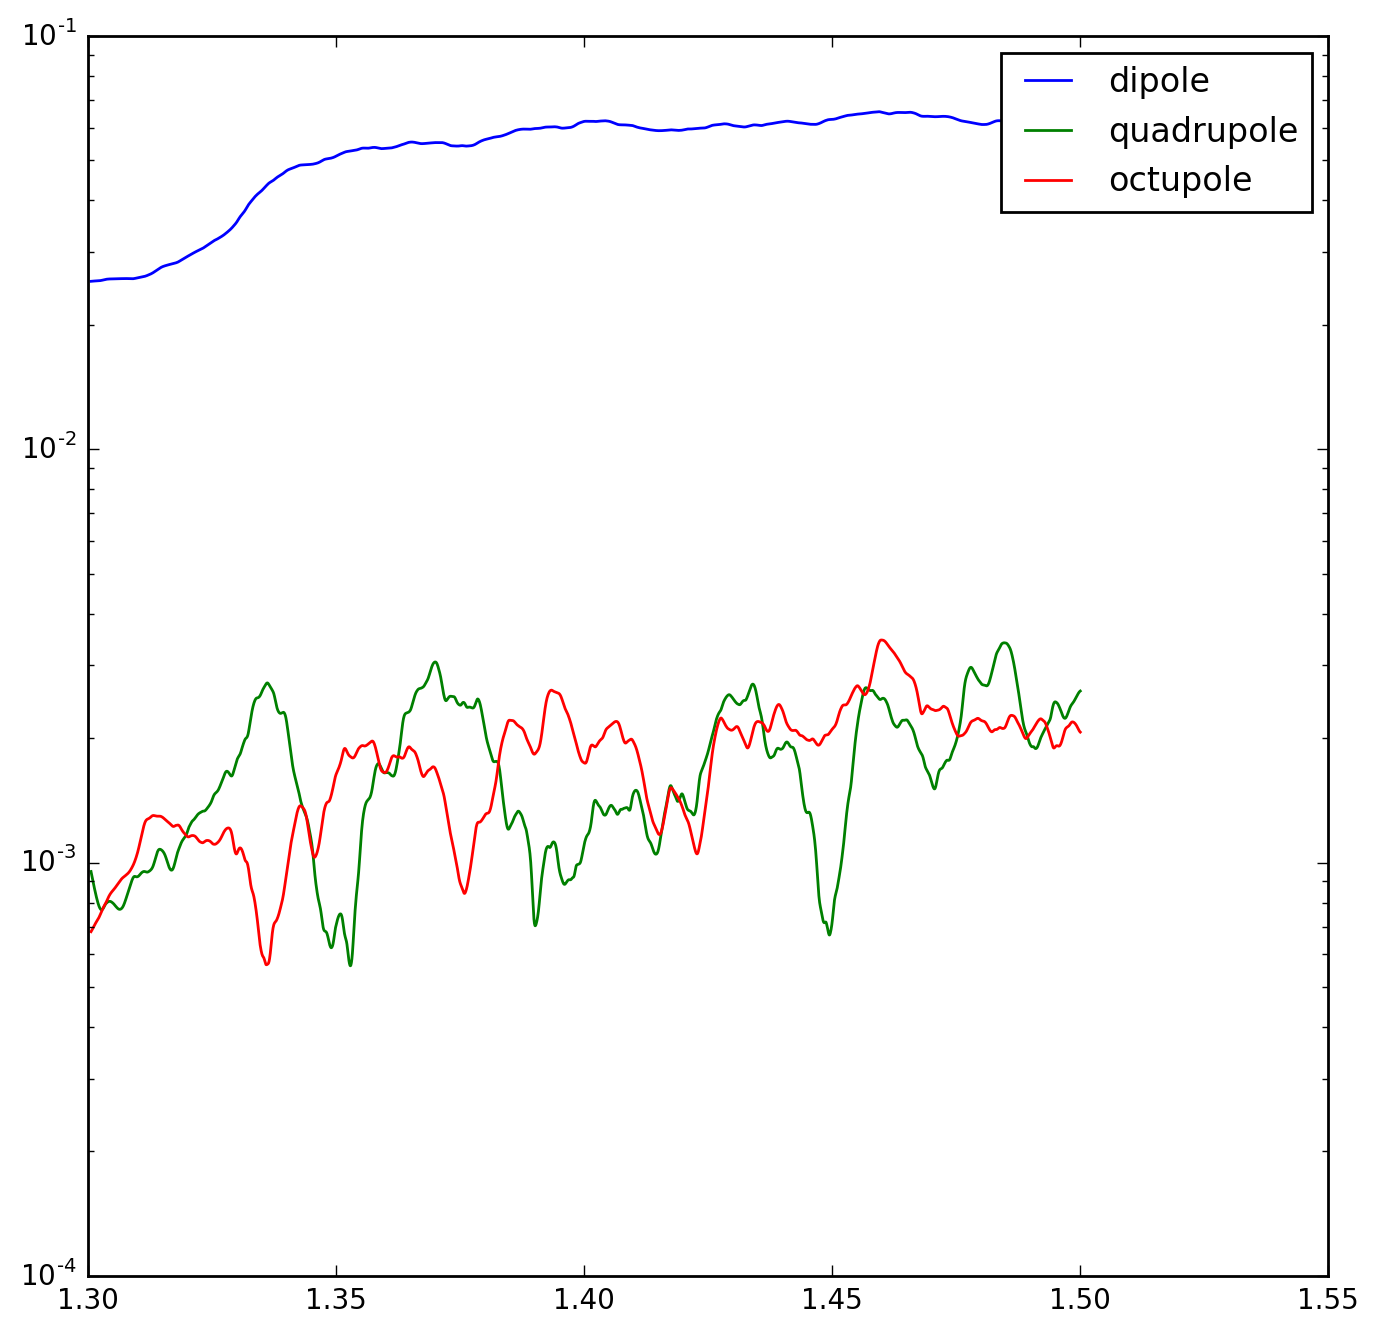

In [14]:
plt.figure(figsize=(8,8))
plt.plot(by_pole.index.tolist(), by_pole.dipole.tolist(), label='dipole')
plt.plot(by_pole.index.tolist(), by_pole.quadrupole.tolist(), label='quadrupole')
plt.plot(by_pole.index.tolist(), by_pole.octupole.tolist(), label='octupole')
plt.yscale('log')
plt.legend()
plt.show()

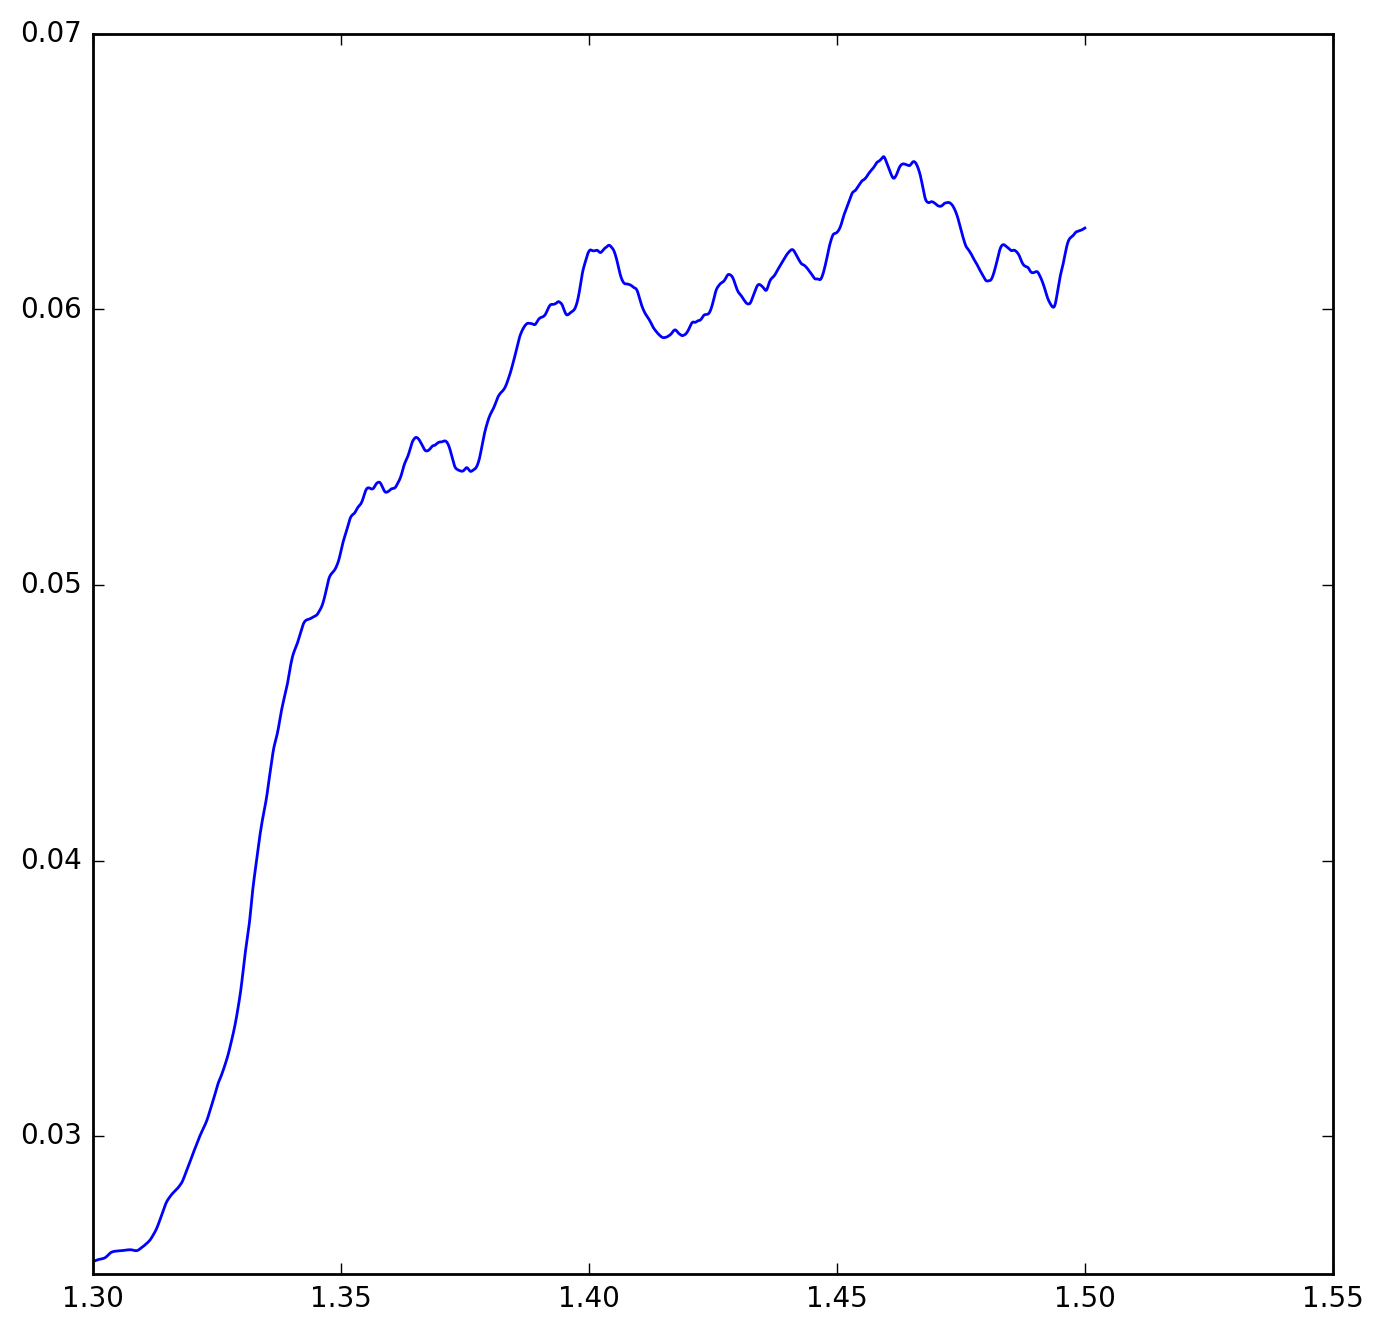

In [15]:
plt.figure(figsize=(8,8))
plt.plot(by_pole.index.tolist(), by_pole.dipole.tolist(), label='dipole')
plt.show()

In [16]:
gauss_coef.reset_index(drop=True, inplace=True)

In [17]:
t_0 = list(gauss_coef.ix[0, ['g1_0', 'g1_1', 'h1_1', 'g2_0', 'g2_1', 'h2_1', 'g2_2', 'h2_2', 'g3_0', 'g3_1', 'h3_1', 'g3_2', 'h3_2', 'g3_3', 'h3_3']])

In [18]:
gauss_coef

t_step     time      h1_1      g1_0      g1_1      h2_2      h2_1  \
0     2601100.0  1.30055 -0.000164  0.025473 -0.000672  0.000193  0.000263   
1     2601200.0  1.30060 -0.000164  0.025477 -0.000672  0.000191  0.000262   
2     2601300.0  1.30065 -0.000165  0.025481 -0.000673  0.000189  0.000261   
3     2601400.0  1.30070 -0.000165  0.025485 -0.000673  0.000187  0.000261   
4     2601500.0  1.30075 -0.000165  0.025489 -0.000674  0.000185  0.000260   
5     2601600.0  1.30080 -0.000166  0.025492 -0.000674  0.000183  0.000259   
6     2601700.0  1.30085 -0.000167  0.025495 -0.000675  0.000181  0.000259   
7     2601800.0  1.30090 -0.000167  0.025498 -0.000676  0.000178  0.000258   
8     2601900.0  1.30095 -0.000168  0.025501 -0.000676  0.000176  0.000258   
9     2602000.0  1.30100 -0.000169  0.025504 -0.000677  0.000174  0.000258   
10    2602100.0  1.30105 -0.000170  0.025506 -0.000678  0.000171  0.000257   
11    2602200.0  1.30110 -0.000171  0.025509 -0.000680  0.000169  0.000257   
12    2602300.0  1.30115 -0.000171  0.025511 -0.000681  0.000167  0.000257   
13    2602400.0  1.30120 -0.000172  0.025513 -0.000682  0.000165  0.000257   
14    2602500.0  1.30125 -0.000173  0.025515 -0.000683  0.000162  0.000257   
15    2602600.0  1.30130 -0.000173  0.025517 -0.000685  0.000160  0.000257   
16    2602700.0  1.30135 -0.000173  0.025519 -0.000686  0.000158  0.000257   
17    2602800.0  1.30140 -0.000174  0.025520 -0.000687  0.000155  0.000258   
18    2602900.0  1.30145 -0.000174  0.025522 -0.000688  0.000153  0.000258   
19    2603000.0  1.30150 -0.000174  0.025524 -0.000690  0.000150  0.000258   
20    2603100.0  1.30155 -0.000175  0.025525 -0.000691  0.000148  0.000259   
21    2603200.0  1.30160 -0.000175  0.025527 -0.000692  0.000146  0.000259   
22    2603300.0  1.30165 -0.000176  0.025528 -0.000694  0.000143  0.000260   
23    2603400.0  1.30170 -0.000176  0.025530 -0.000695  0.000141  0.000260   
24    2603500.0  1.30175 -0.000177  0.025532 -0.000696  0.000139  0.000261   
25    2603600.0  1.30180 -0.000177  0.025534 -0.000698  0.000137  0.000262   
26    2603700.0  1.30185 -0.000178  0.025536 -0.000699  0.000135  0.000262   
27    2603800.0  1.30190 -0.000179  0.025538 -0.000700  0.000133  0.000262   
28    2603900.0  1.30195 -0.000179  0.025540 -0.000702  0.000131  0.000263   
29    2604000.0  1.30200 -0.000180  0.025543 -0.000703  0.000129  0.000263   
...         ...      ...       ...       ...       ...       ...       ...   
3960  2997100.0  1.49855  0.005545  0.062571 -0.001485 -0.000372  0.001752   
3961  2997200.0  1.49860  0.005553  0.062574 -0.001473 -0.000376  0.001747   
3962  2997300.0  1.49865  0.005560  0.062577 -0.001460 -0.000379  0.001742   
3963  2997400.0  1.49870  0.005567  0.062580 -0.001448 -0.000381  0.001738   
3964  2997500.0  1.49875  0.005572  0.062583 -0.001437 -0.000382  0.001734   
3965  2997600.0  1.49880  0.005578  0.062586 -0.001426 -0.000383  0.001729   
3966  2997700.0  1.49885  0.005583  0.062590 -0.001417 -0.000382  0.001726   
3967  2997800.0  1.49890  0.005588  0.062593 -0.001408 -0.000382  0.001723   
3968  2997900.0  1.49895  0.005594  0.062596 -0.001400 -0.000380  0.001720   
3969  2998000.0  1.49900  0.005599  0.062599 -0.001393 -0.000379  0.001717   
3970  2998100.0  1.49905  0.005605  0.062602 -0.001386 -0.000377  0.001715   
3971  2998200.0  1.49910  0.005612  0.062604 -0.001381 -0.000374  0.001713   
3972  2998300.0  1.49915  0.005619  0.062606 -0.001375 -0.000372  0.001711   
3973  2998400.0  1.49920  0.005627  0.062608 -0.001369 -0.000369  0.001709   
3974  2998500.0  1.49925  0.005636  0.062610 -0.001364 -0.000366  0.001708   
3975  2998600.0  1.49930  0.005647  0.062613 -0.001357 -0.000363  0.001707   
3976  2998700.0  1.49935  0.005658  0.062616 -0.001350 -0.000359  0.001706   
3977  2998800.0  1.49940  0.005671  0.062619 -0.001343 -0.000356  0.001705   
3978  2998900.0  1.49945  0.005684  0.062623 -0.001335 -0.000352  0.001704   
3979  2999000.0  1.49950  0.005

In [20]:
gauss_coef.reset_index(drop=True, inplace=True)

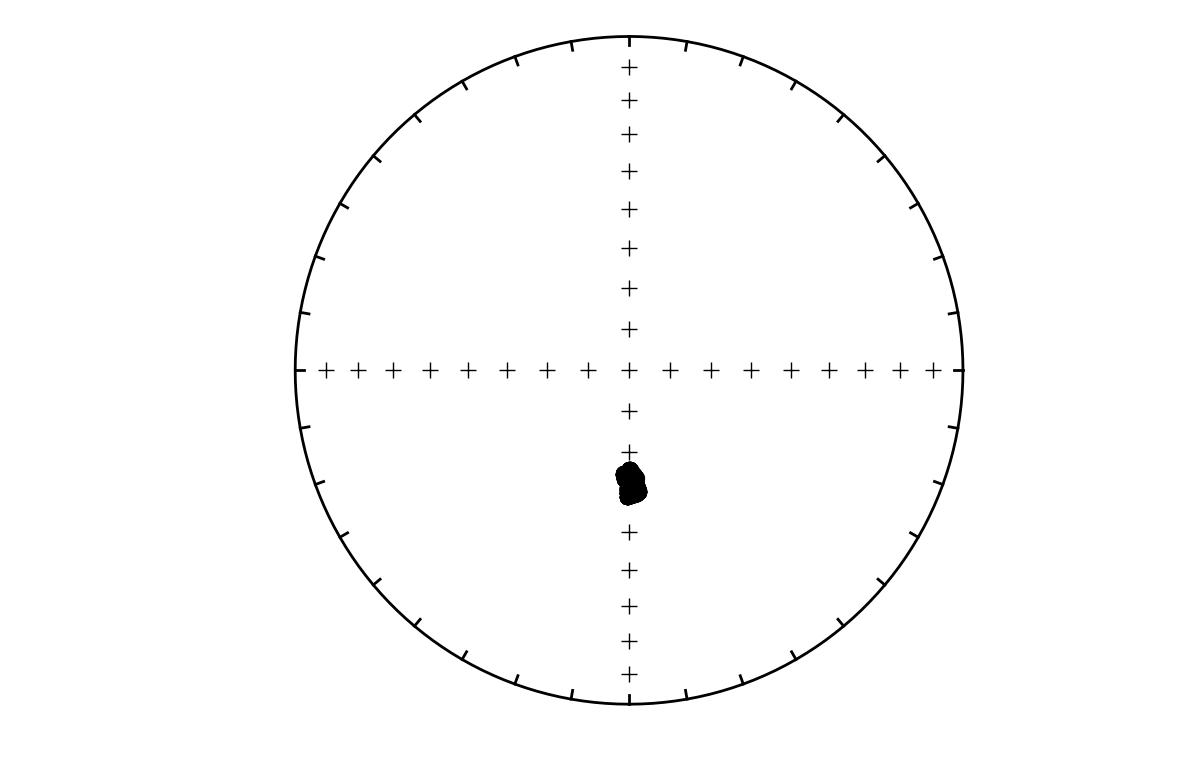

In [21]:
plt.figure(1)
ipmag.plot_net(1)
for i in range(0, 1990):
    time_step = list(gauss_coef.ix[i, ['g1_0', 'g1_1', 'h1_1', 'g2_0', 'g2_1', 'h2_1', 'g2_2', 'h2_2', 'g3_0', 'g3_1', 'h3_1', 'g3_2', 'h3_2', 'g3_3', 'h3_3']])
    block = list(pmag.getvec(time_step,-45, 180))
#     print "dec = ", block[0]
#     print "inc = ", block[1]
    ipmag.plot_di(block[0], block[1])
plt.show()

In [22]:
gauss_coef

t_step     time      h1_1      g1_0      g1_1      h2_2      h2_1  \
0     2601100.0  1.30055 -0.000164  0.025473 -0.000672  0.000193  0.000263   
1     2601200.0  1.30060 -0.000164  0.025477 -0.000672  0.000191  0.000262   
2     2601300.0  1.30065 -0.000165  0.025481 -0.000673  0.000189  0.000261   
3     2601400.0  1.30070 -0.000165  0.025485 -0.000673  0.000187  0.000261   
4     2601500.0  1.30075 -0.000165  0.025489 -0.000674  0.000185  0.000260   
5     2601600.0  1.30080 -0.000166  0.025492 -0.000674  0.000183  0.000259   
6     2601700.0  1.30085 -0.000167  0.025495 -0.000675  0.000181  0.000259   
7     2601800.0  1.30090 -0.000167  0.025498 -0.000676  0.000178  0.000258   
8     2601900.0  1.30095 -0.000168  0.025501 -0.000676  0.000176  0.000258   
9     2602000.0  1.30100 -0.000169  0.025504 -0.000677  0.000174  0.000258   
10    2602100.0  1.30105 -0.000170  0.025506 -0.000678  0.000171  0.000257   
11    2602200.0  1.30110 -0.000171  0.025509 -0.000680  0.000169  0.000257   
12    2602300.0  1.30115 -0.000171  0.025511 -0.000681  0.000167  0.000257   
13    2602400.0  1.30120 -0.000172  0.025513 -0.000682  0.000165  0.000257   
14    2602500.0  1.30125 -0.000173  0.025515 -0.000683  0.000162  0.000257   
15    2602600.0  1.30130 -0.000173  0.025517 -0.000685  0.000160  0.000257   
16    2602700.0  1.30135 -0.000173  0.025519 -0.000686  0.000158  0.000257   
17    2602800.0  1.30140 -0.000174  0.025520 -0.000687  0.000155  0.000258   
18    2602900.0  1.30145 -0.000174  0.025522 -0.000688  0.000153  0.000258   
19    2603000.0  1.30150 -0.000174  0.025524 -0.000690  0.000150  0.000258   
20    2603100.0  1.30155 -0.000175  0.025525 -0.000691  0.000148  0.000259   
21    2603200.0  1.30160 -0.000175  0.025527 -0.000692  0.000146  0.000259   
22    2603300.0  1.30165 -0.000176  0.025528 -0.000694  0.000143  0.000260   
23    2603400.0  1.30170 -0.000176  0.025530 -0.000695  0.000141  0.000260   
24    2603500.0  1.30175 -0.000177  0.025532 -0.000696  0.000139  0.000261   
25    2603600.0  1.30180 -0.000177  0.025534 -0.000698  0.000137  0.000262   
26    2603700.0  1.30185 -0.000178  0.025536 -0.000699  0.000135  0.000262   
27    2603800.0  1.30190 -0.000179  0.025538 -0.000700  0.000133  0.000262   
28    2603900.0  1.30195 -0.000179  0.025540 -0.000702  0.000131  0.000263   
29    2604000.0  1.30200 -0.000180  0.025543 -0.000703  0.000129  0.000263   
...         ...      ...       ...       ...       ...       ...       ...   
3960  2997100.0  1.49855  0.005545  0.062571 -0.001485 -0.000372  0.001752   
3961  2997200.0  1.49860  0.005553  0.062574 -0.001473 -0.000376  0.001747   
3962  2997300.0  1.49865  0.005560  0.062577 -0.001460 -0.000379  0.001742   
3963  2997400.0  1.49870  0.005567  0.062580 -0.001448 -0.000381  0.001738   
3964  2997500.0  1.49875  0.005572  0.062583 -0.001437 -0.000382  0.001734   
3965  2997600.0  1.49880  0.005578  0.062586 -0.001426 -0.000383  0.001729   
3966  2997700.0  1.49885  0.005583  0.062590 -0.001417 -0.000382  0.001726   
3967  2997800.0  1.49890  0.005588  0.062593 -0.001408 -0.000382  0.001723   
3968  2997900.0  1.49895  0.005594  0.062596 -0.001400 -0.000380  0.001720   
3969  2998000.0  1.49900  0.005599  0.062599 -0.001393 -0.000379  0.001717   
3970  2998100.0  1.49905  0.005605  0.062602 -0.001386 -0.000377  0.001715   
3971  2998200.0  1.49910  0.005612  0.062604 -0.001381 -0.000374  0.001713   
3972  2998300.0  1.49915  0.005619  0.062606 -0.001375 -0.000372  0.001711   
3973  2998400.0  1.49920  0.005627  0.062608 -0.001369 -0.000369  0.001709   
3974  2998500.0  1.49925  0.005636  0.062610 -0.001364 -0.000366  0.001708   
3975  2998600.0  1.49930  0.005647  0.062613 -0.001357 -0.000363  0.001707   
3976  2998700.0  1.49935  0.005658  0.062616 -0.001350 -0.000359  0.001706   
3977  2998800.0  1.49940  0.005671  0.062619 -0.001343 -0.000356  0.001705   
3978  2998900.0  1.49945  0.005684  0.062623 -0.001335 -0.000352  0.001704   
3979  2999000.0  1.49950  0.005

In [23]:
# vgps = pd.DataFrame(columns=['dec', 'inc', 'site_lat', 'site_lon', 'vgp_lat', 'vgp_lon'])
# mean_poles = pd.DataFrame(columns=['site_lat', 'site_lon', 'mean_pole_lat', 'mean_pole_lon', 'mean_pole_A95', 'mean_pole_k', 'actual_pole_lat', 'actual_pole_lon'])
vgps = pd.read_csv('VGPs.csv', usecols=['dec', 'inc', 'site_lat', 'site_lon', 'vgp_lat', 'vgp_lon'])
mean_poles = pd.read_csv('mean_poles.csv', usecols=['site_lat',
                                                    'site_lon',
                                                    'mean_pole_lat',
                                                    'mean_pole_lon', 
                                                    'mean_pole_A95',
                                                    'actual_pole_lat',
                                                    'actual_pole_lon'])

In [24]:
def pole_figure_appearance(size = (7,7), center_lat = 35, center_lon = 200):
    m = Basemap(projection='ortho',lat_0=center_lat,lon_0=center_lon,resolution='c',
                area_thresh=50000)
    plt.figure(figsize=size)
    m.drawcoastlines(linewidth=0.25)
    m.fillcontinents(color='bisque',lake_color='white',zorder=1)
    m.drawmapboundary(fill_color='white')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-90,90,30))
    return m

In [25]:
mode, data = pmag.get_igrf12()

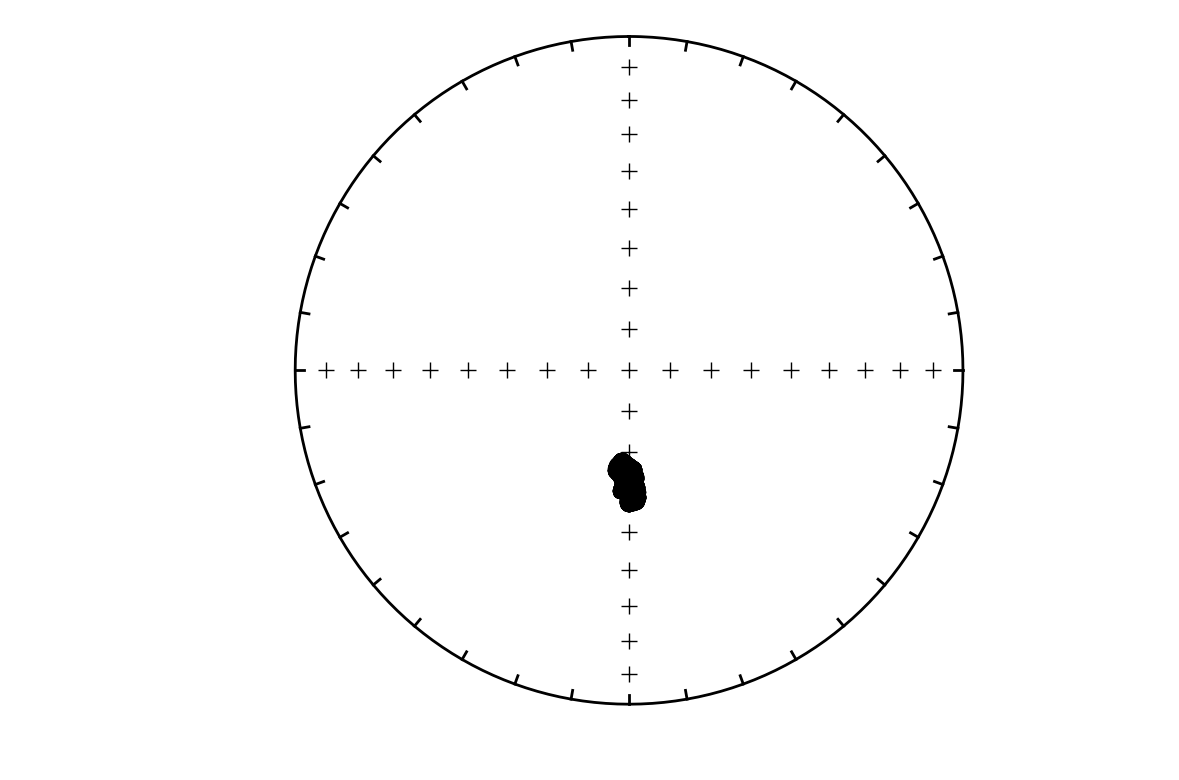

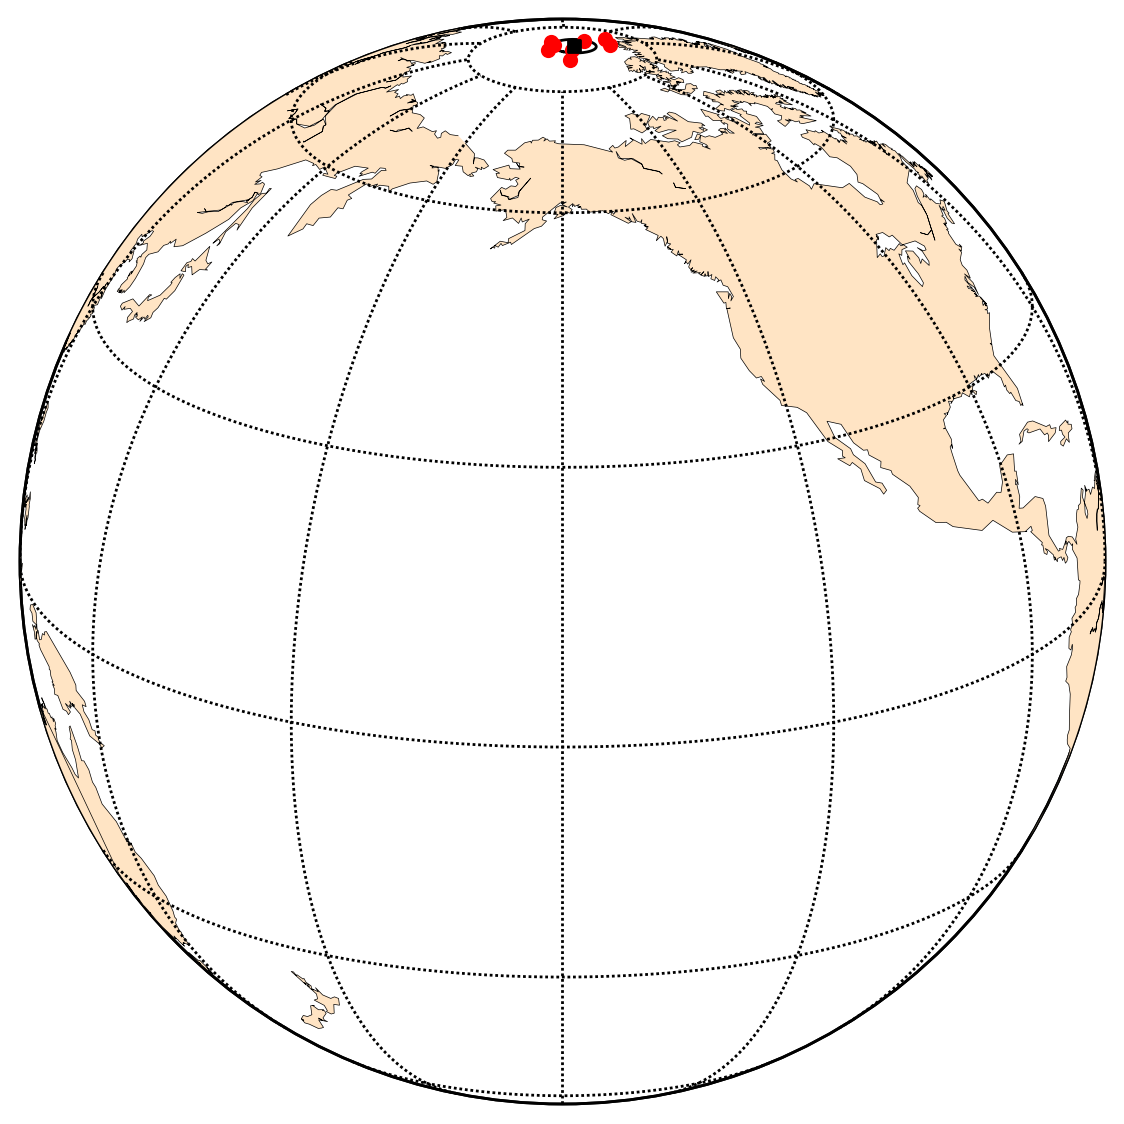

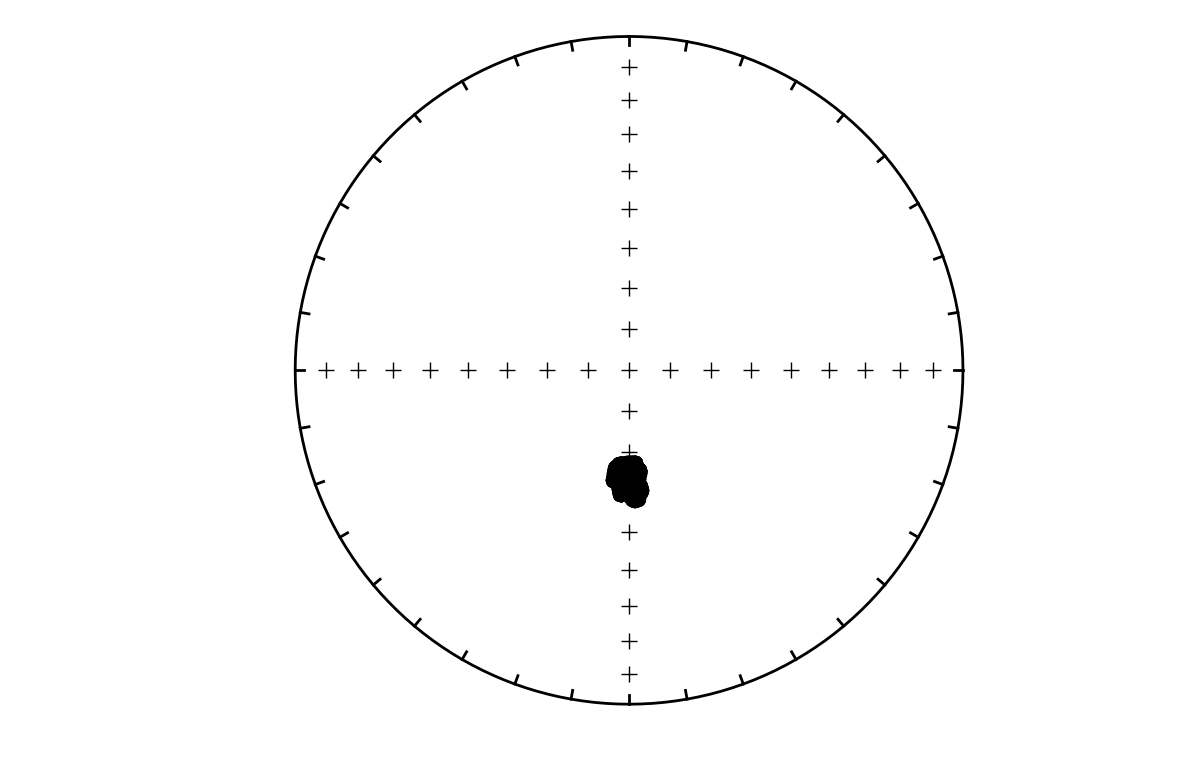

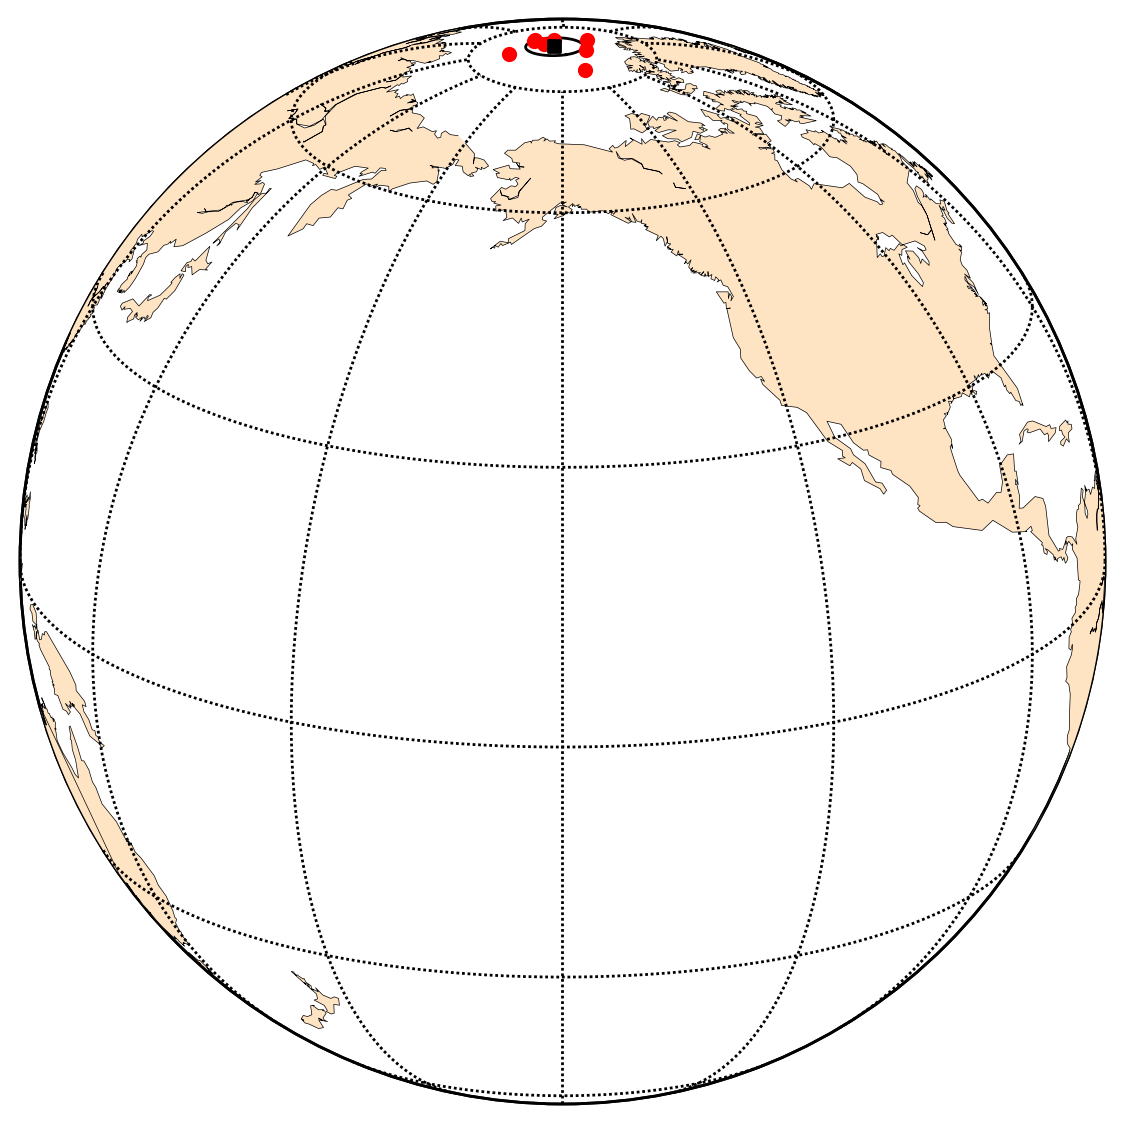

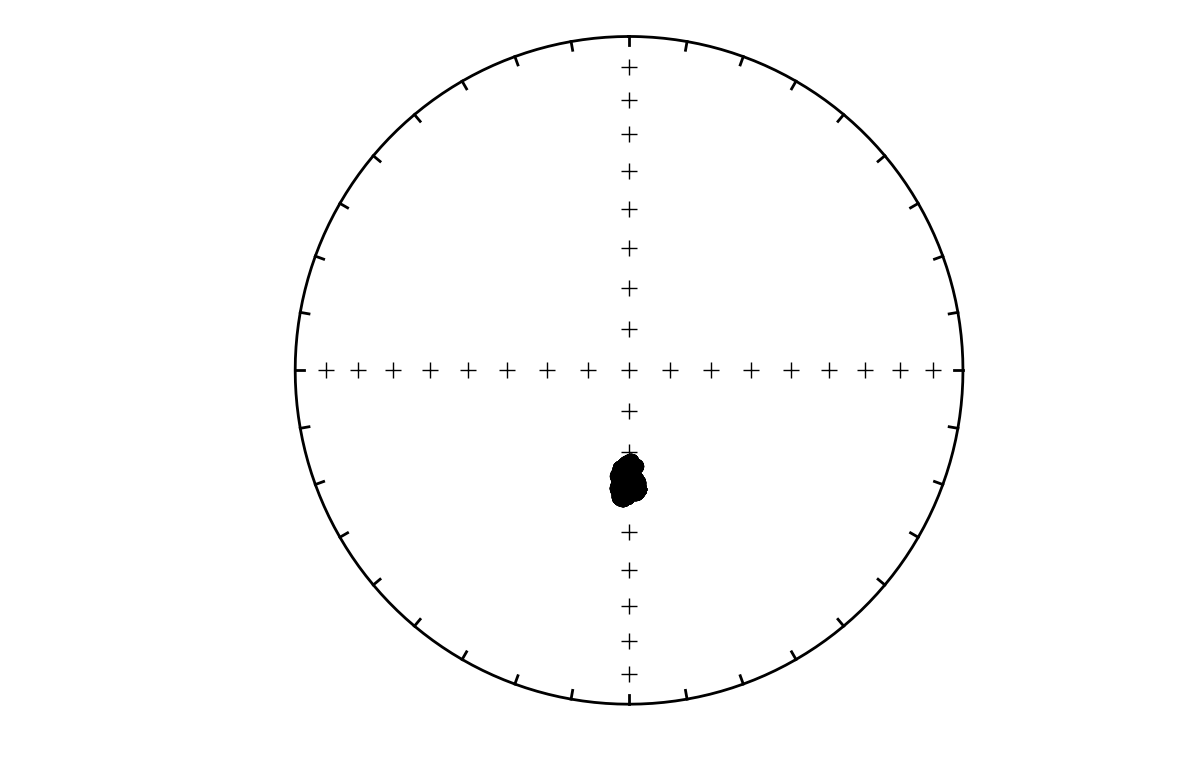

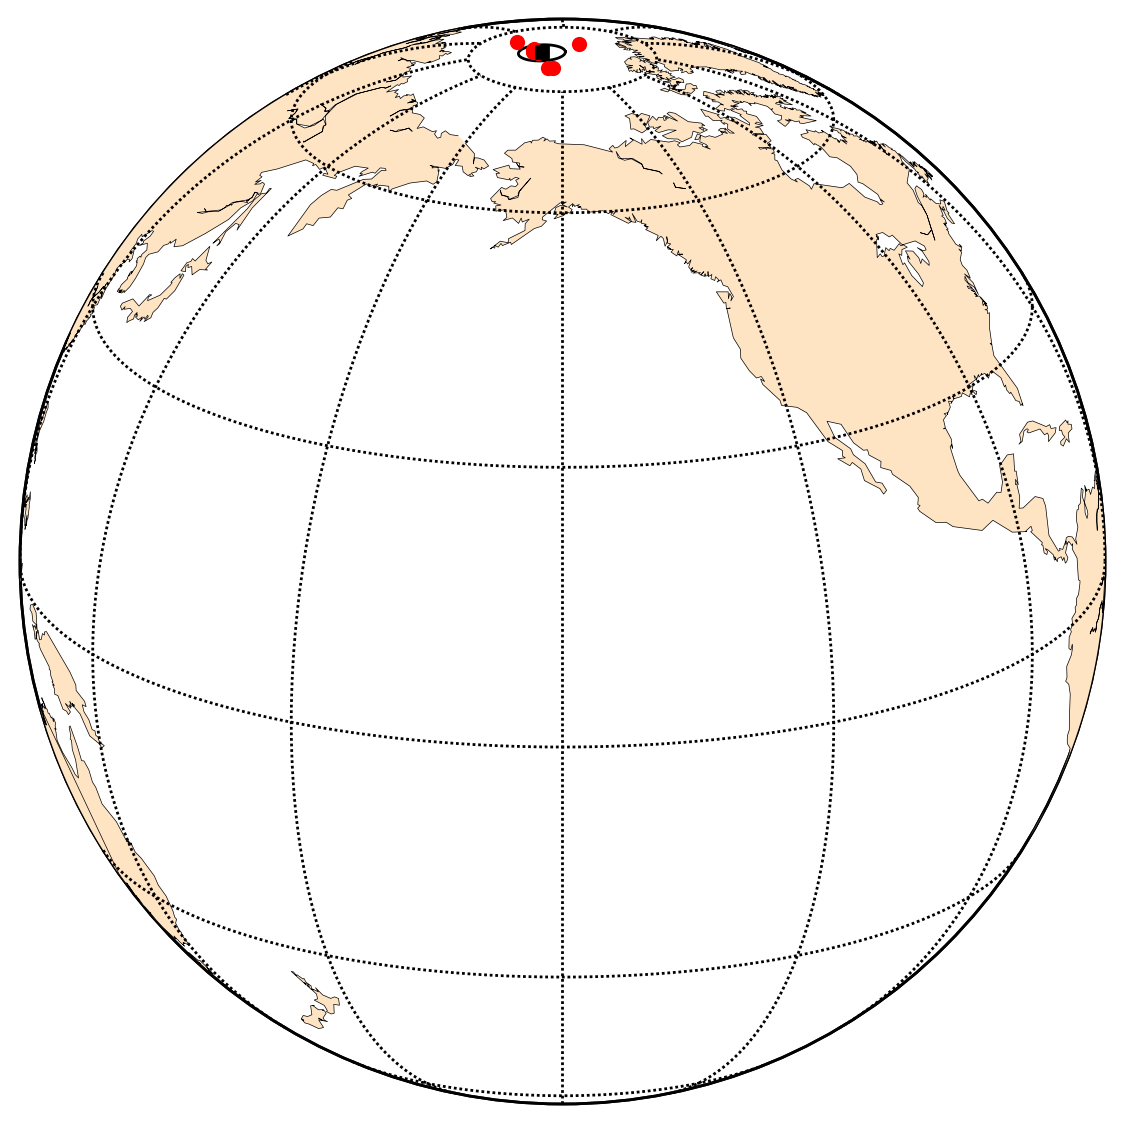

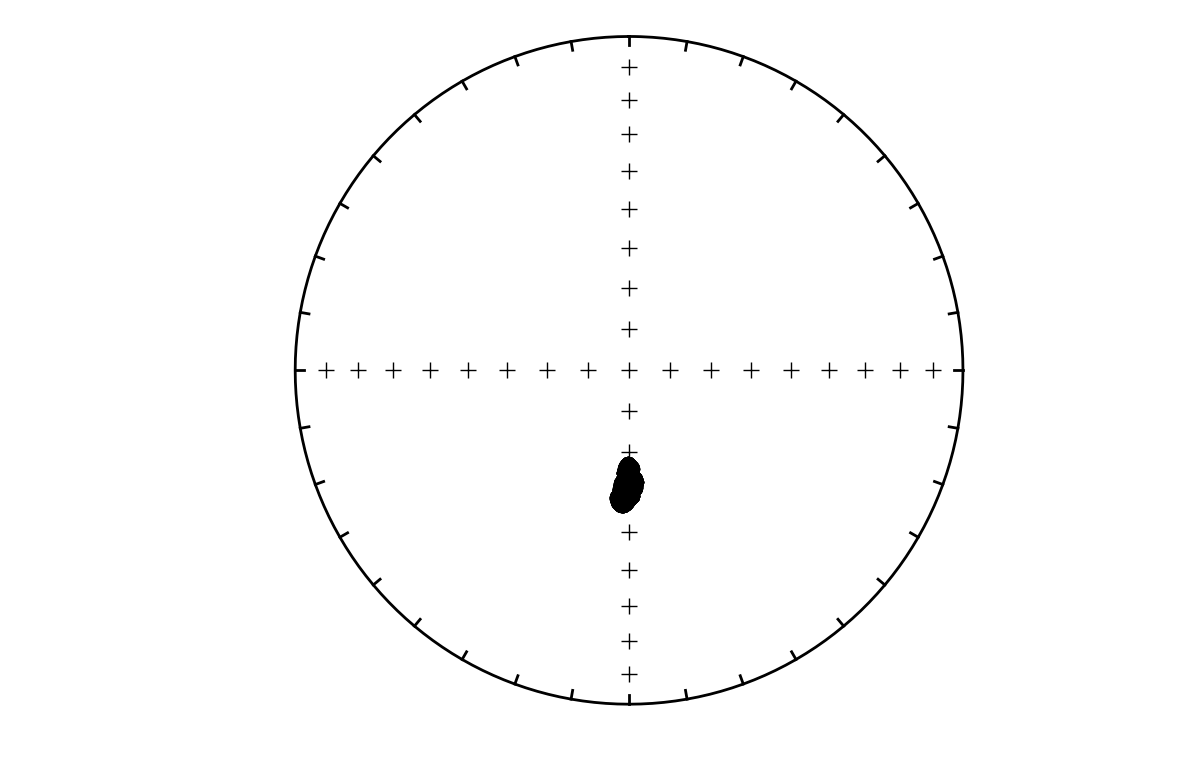

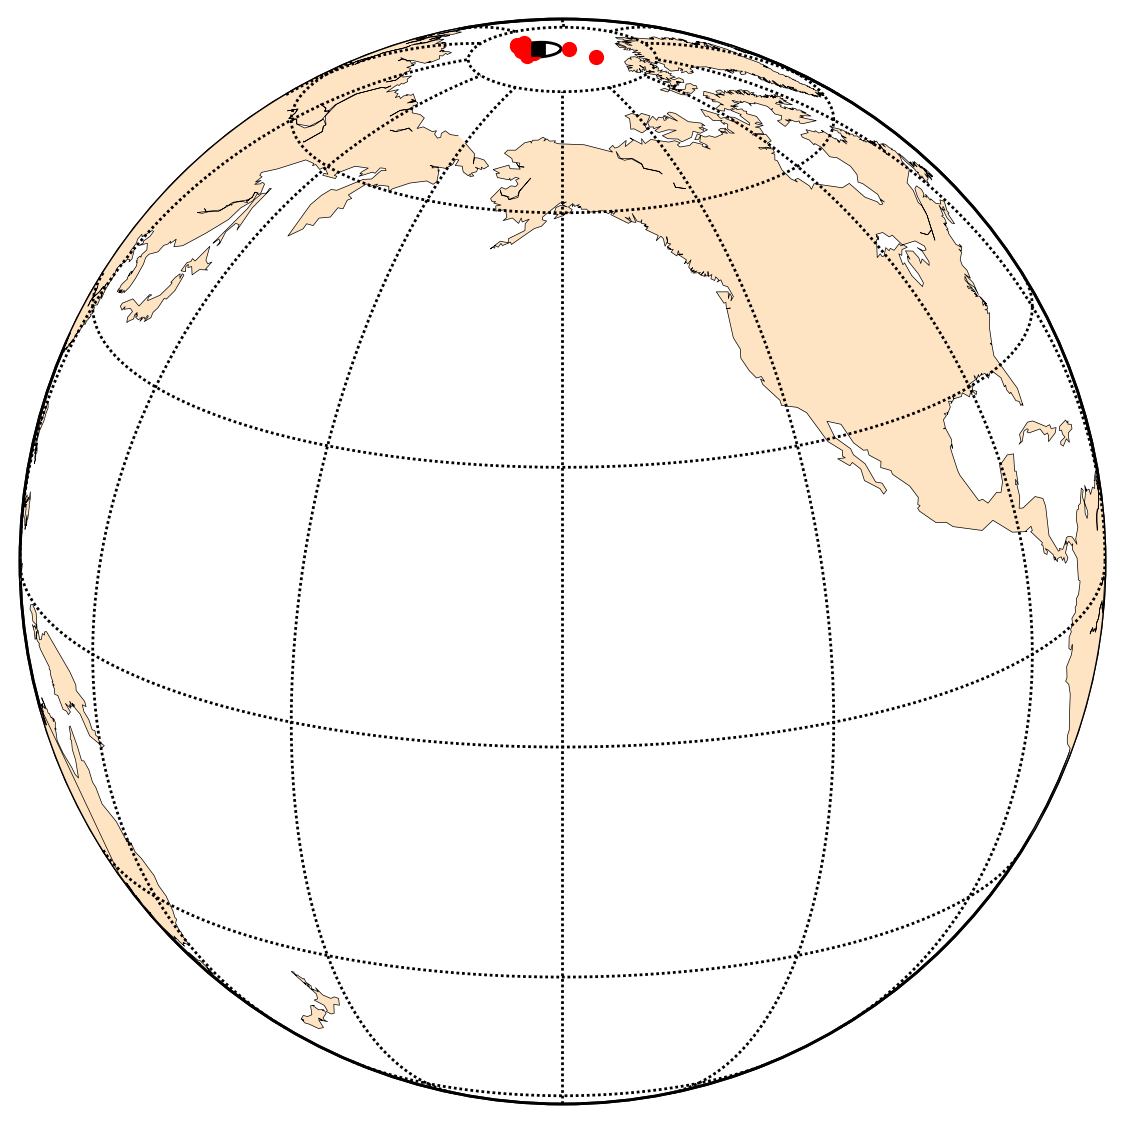

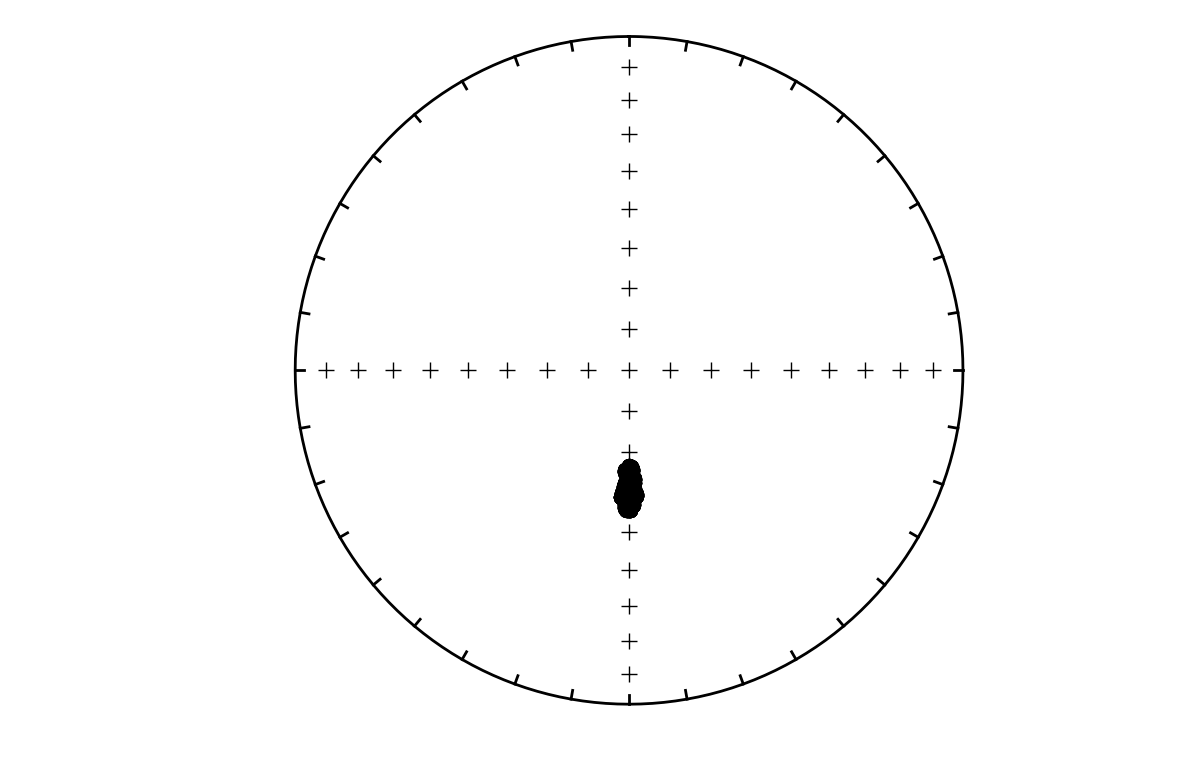

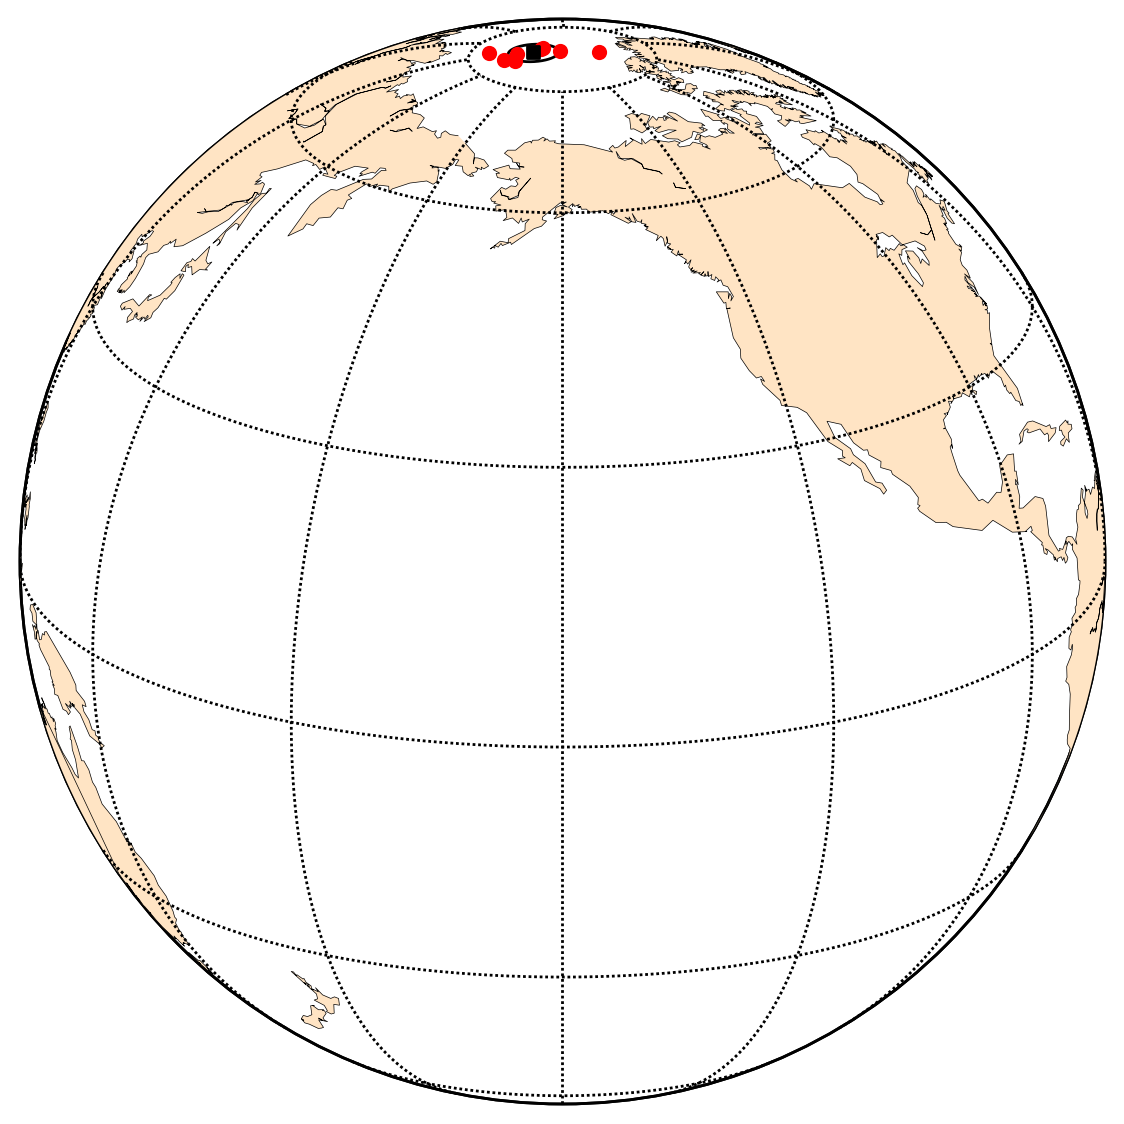

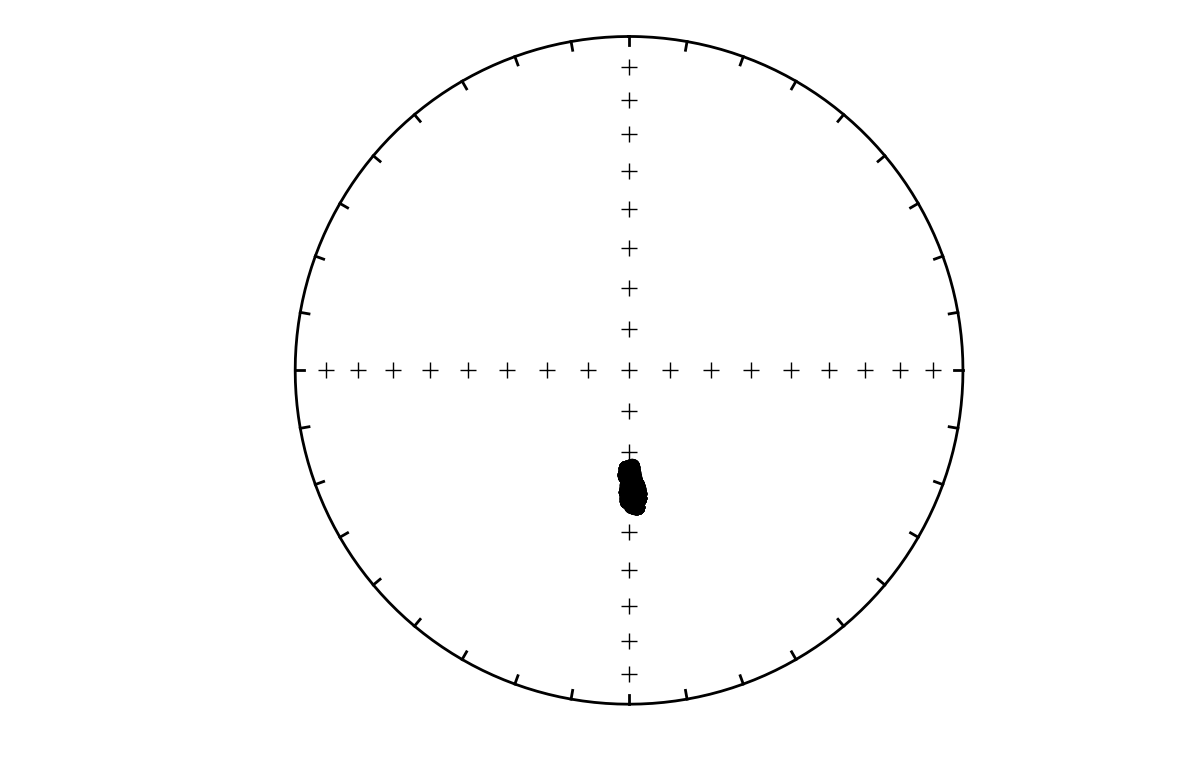

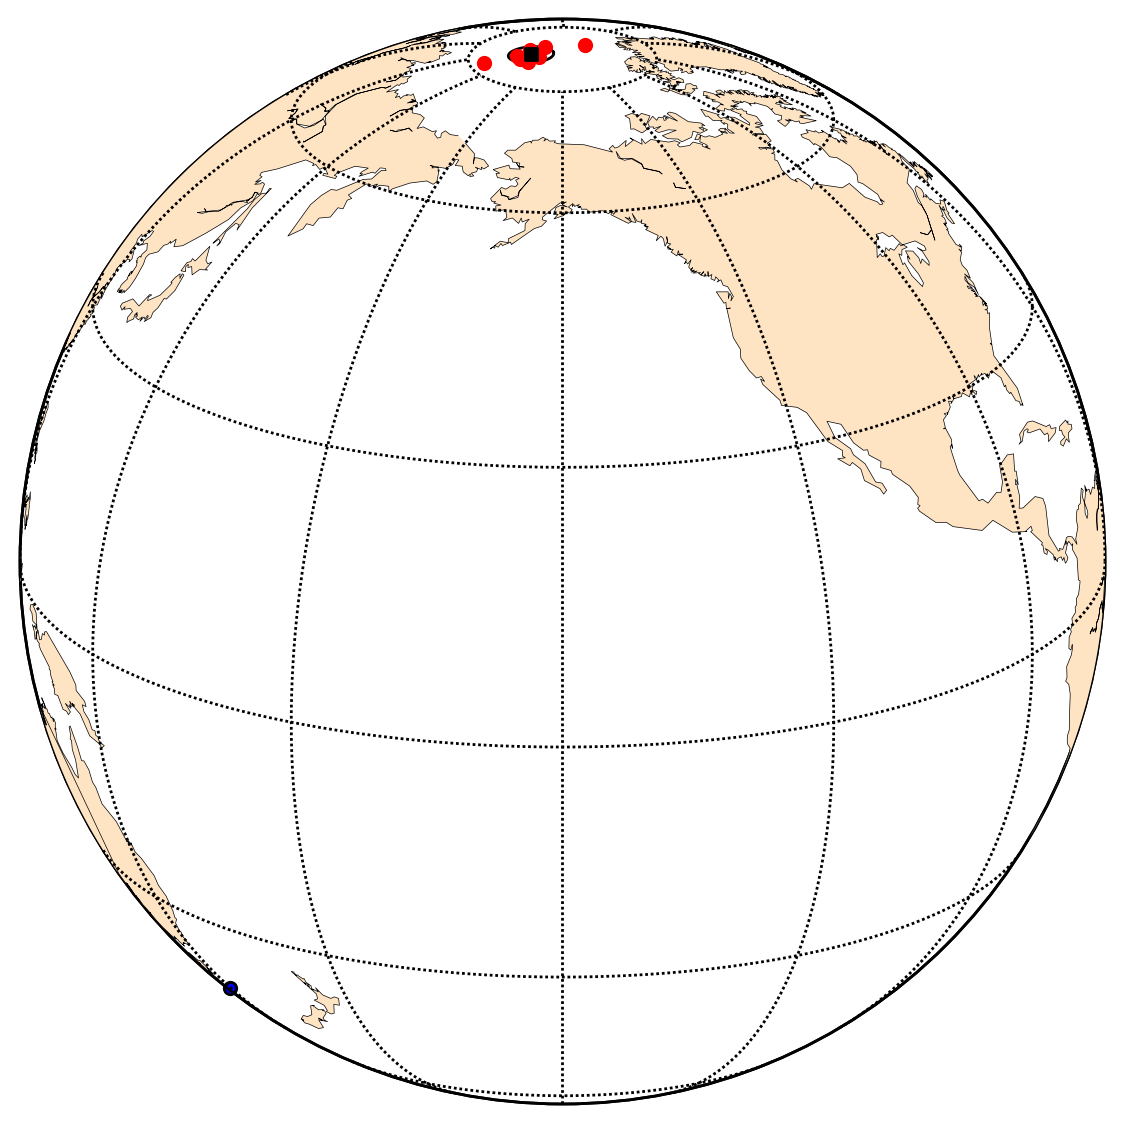

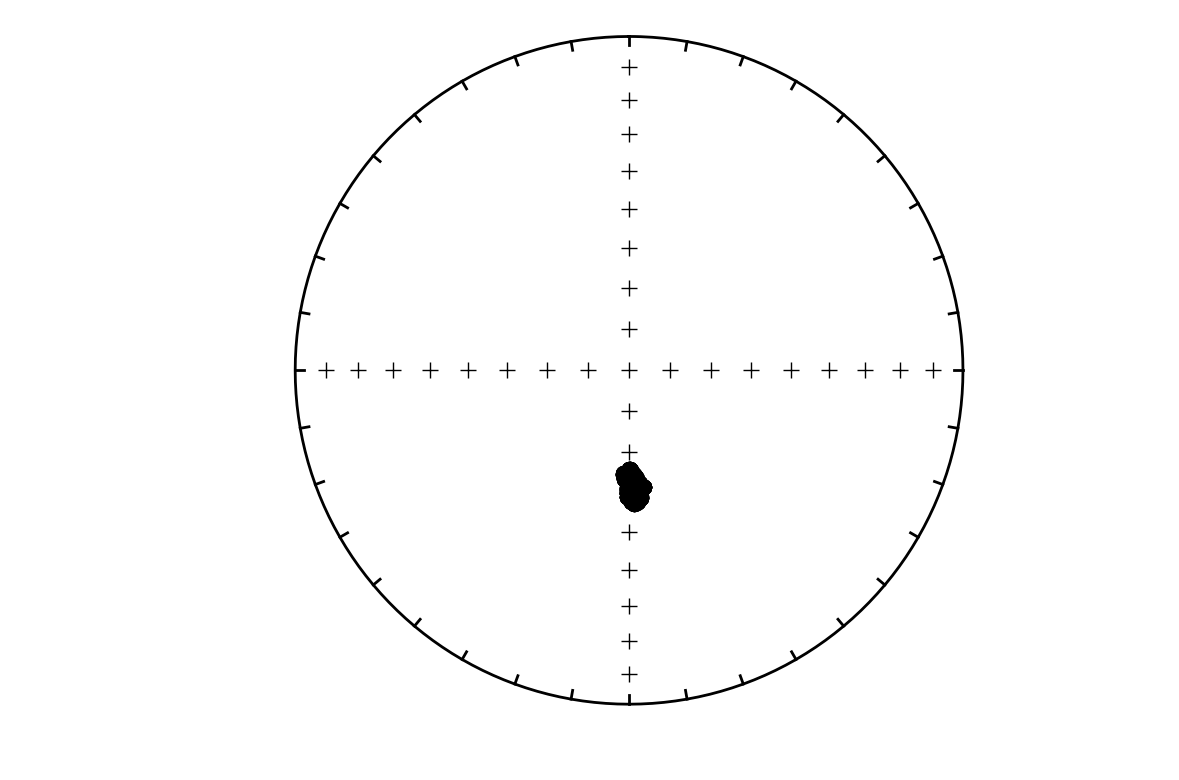

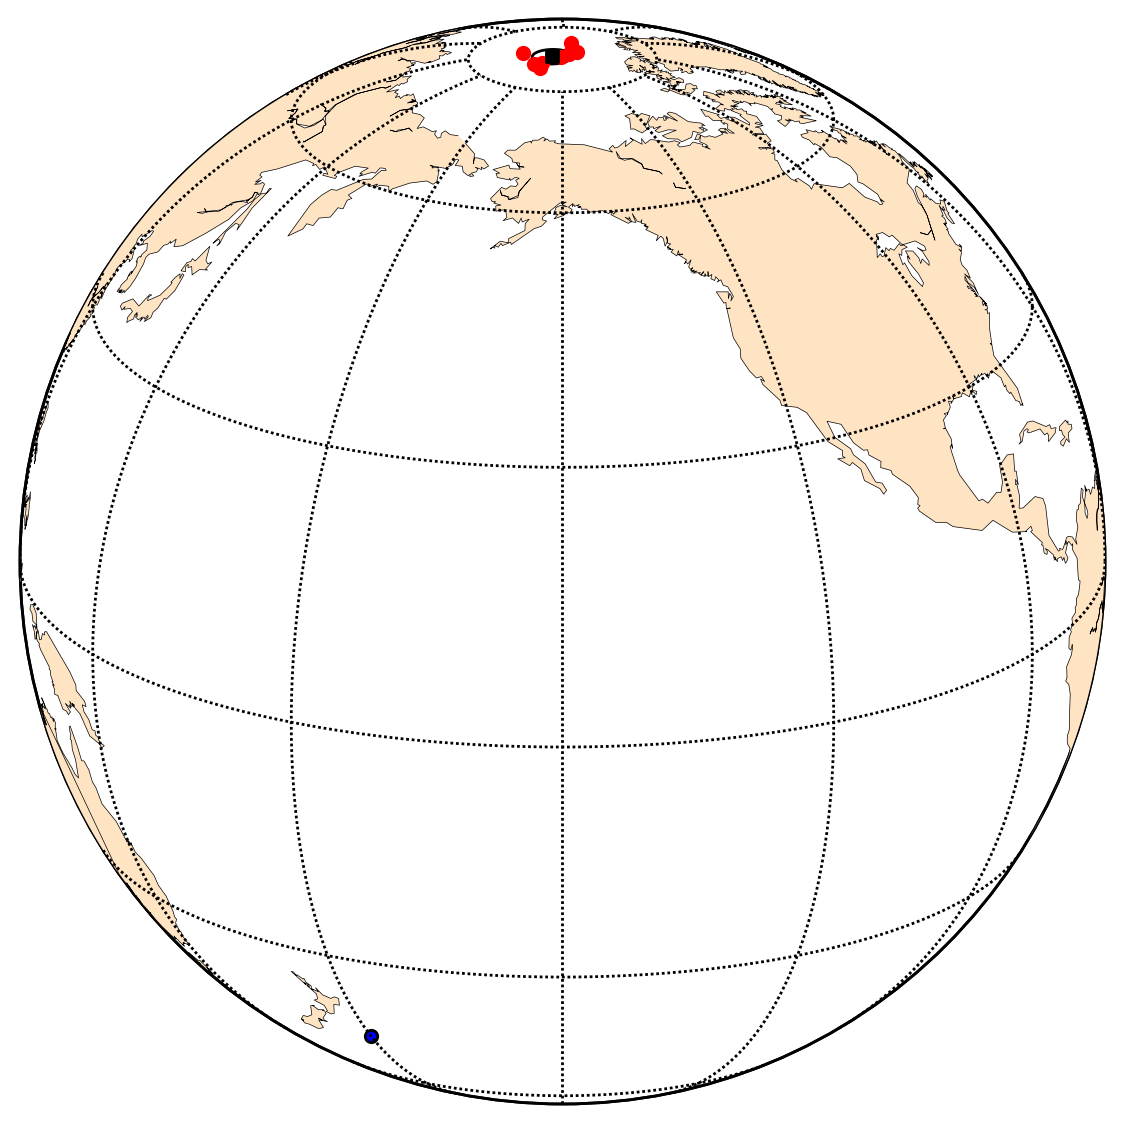

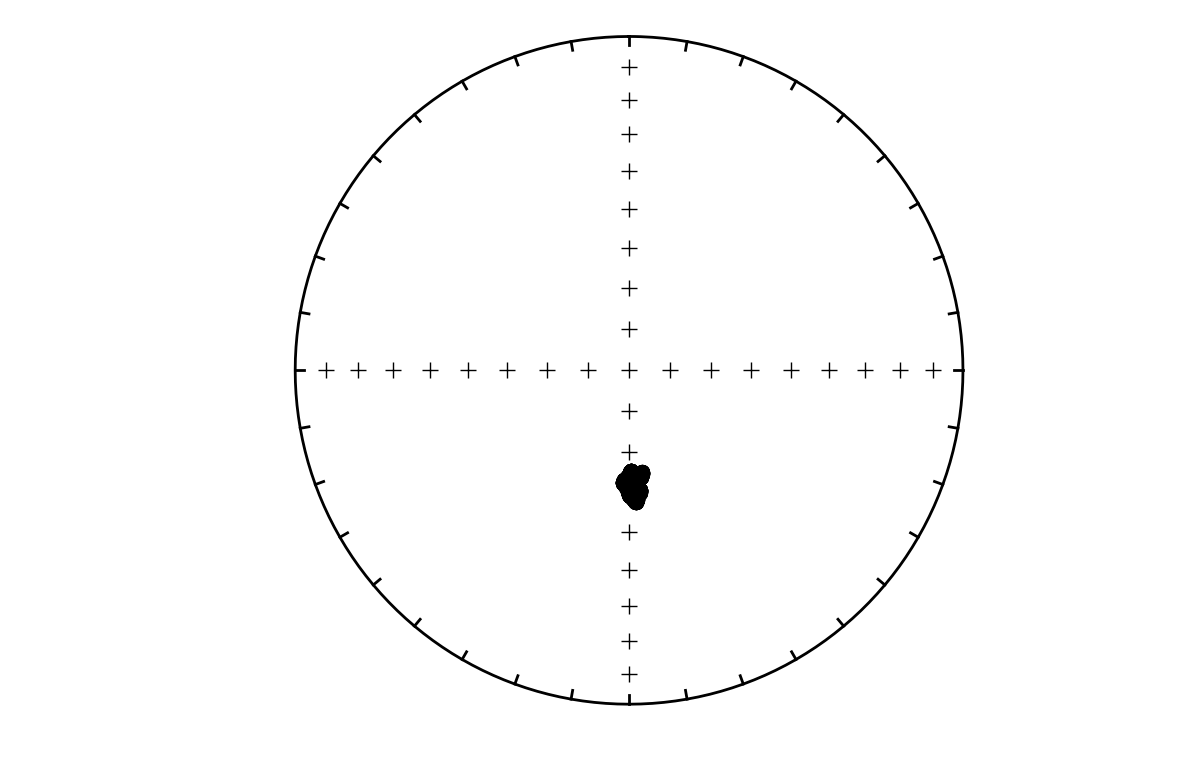

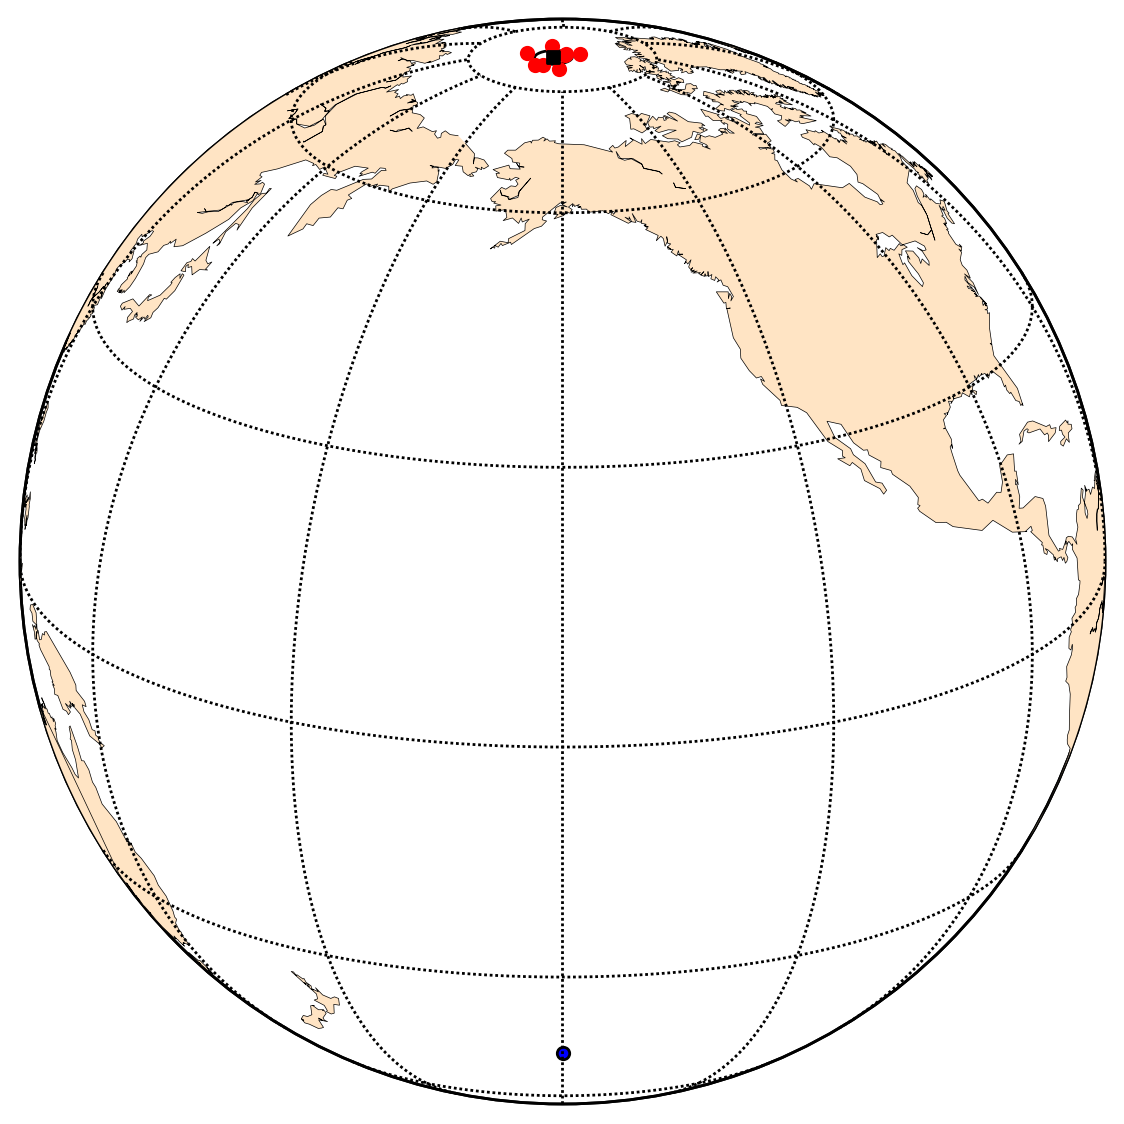

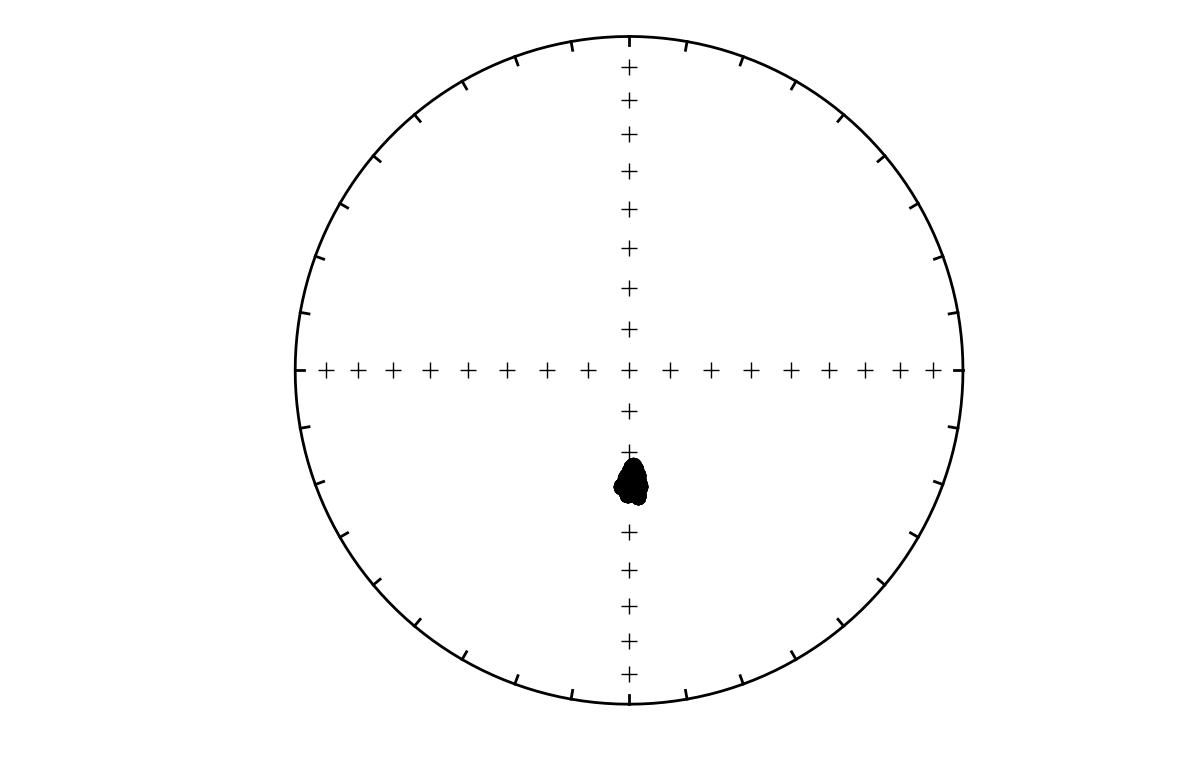

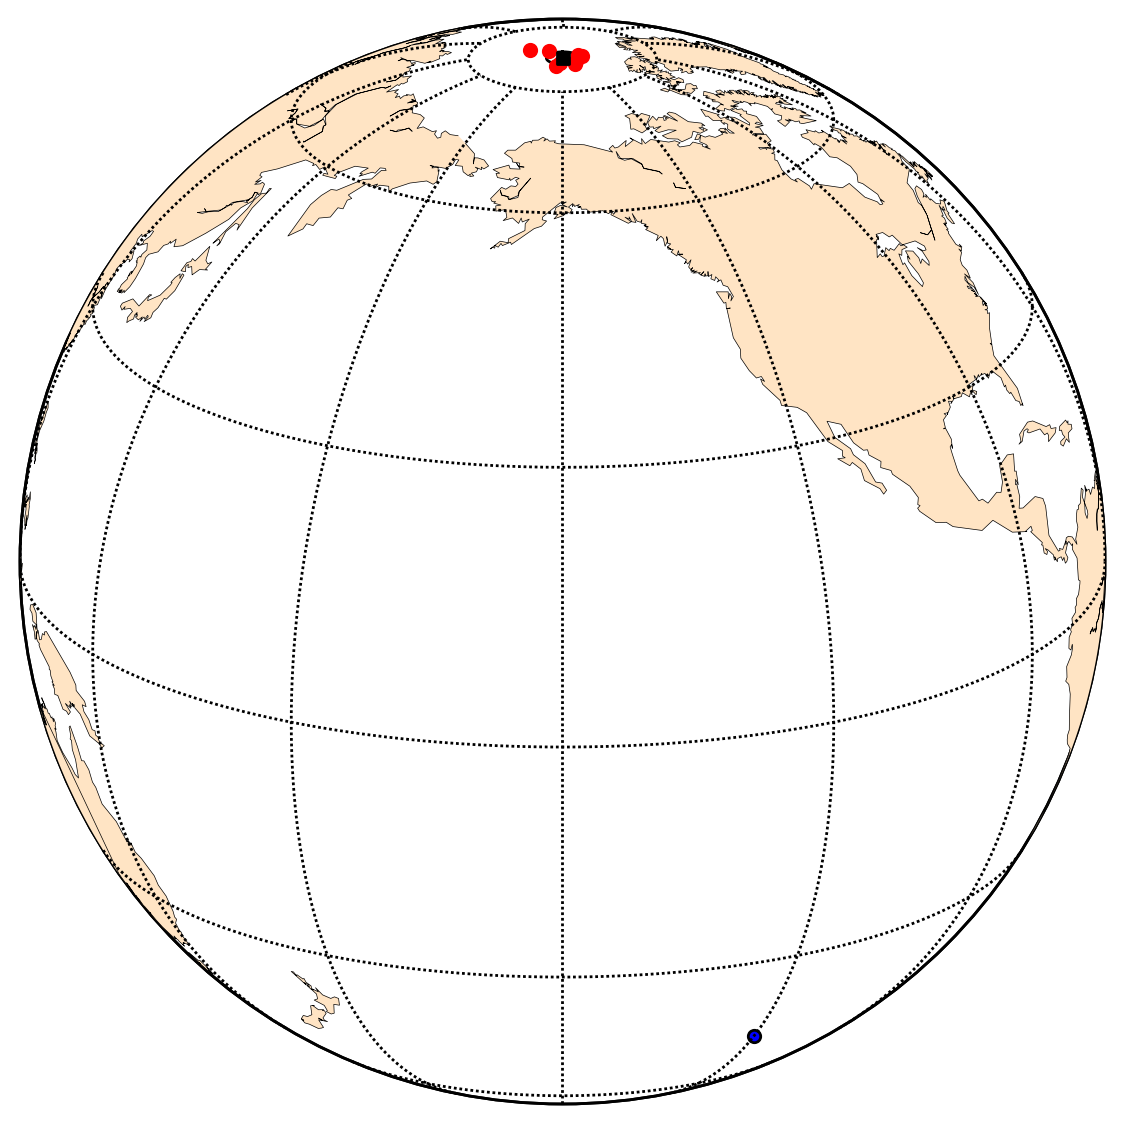

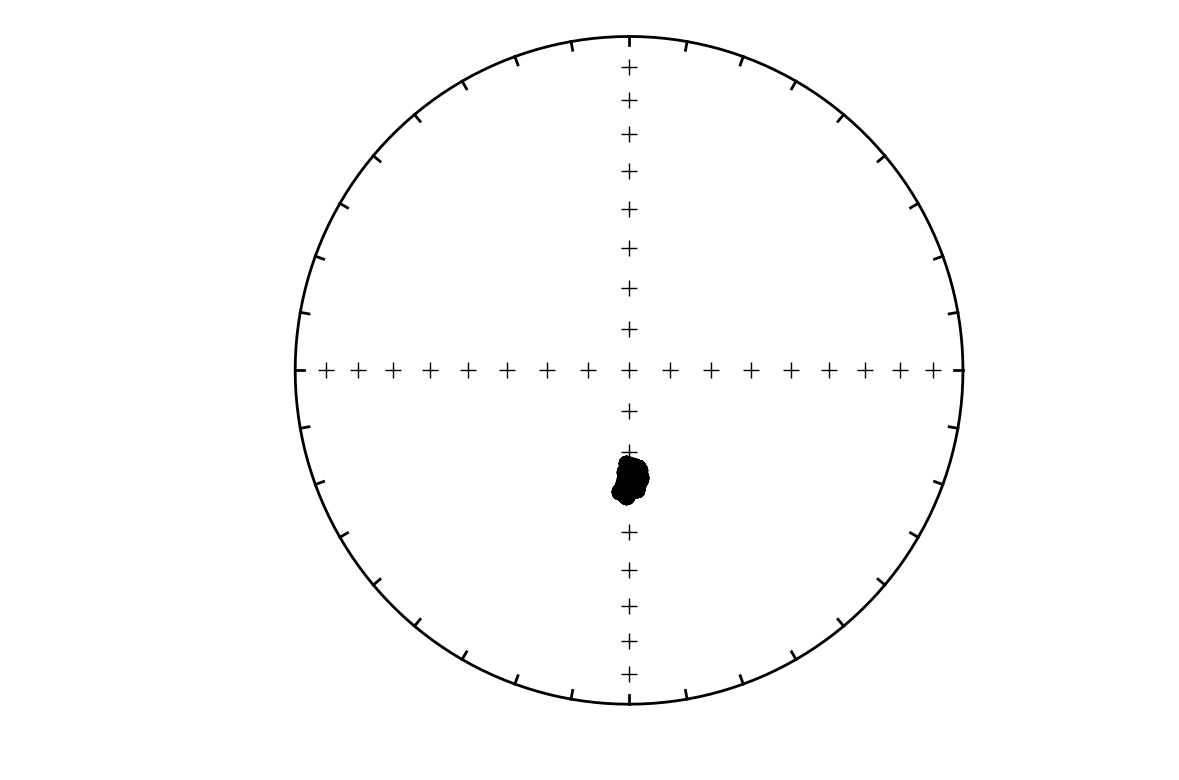

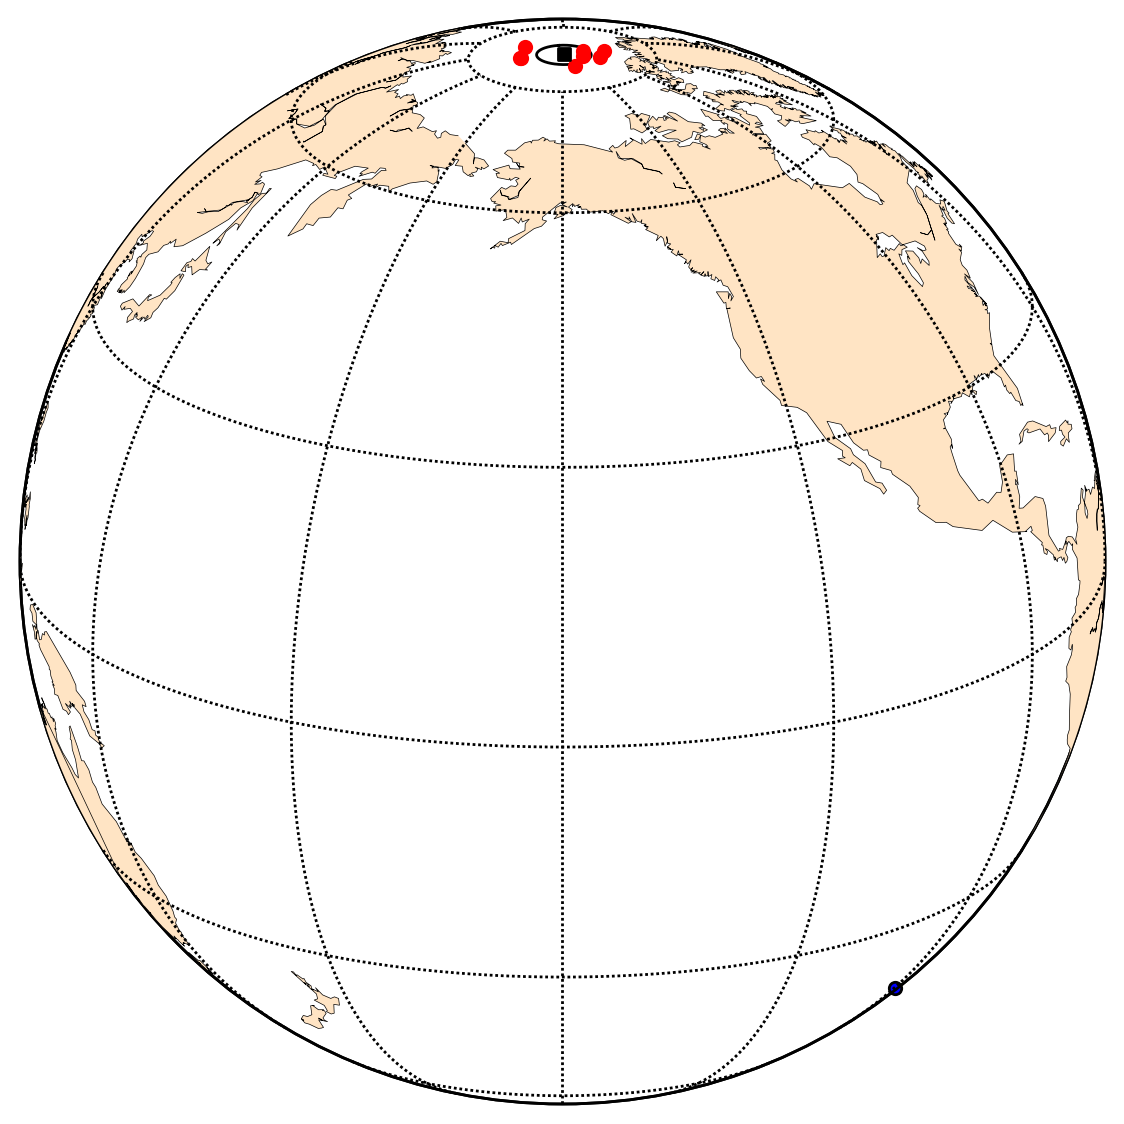

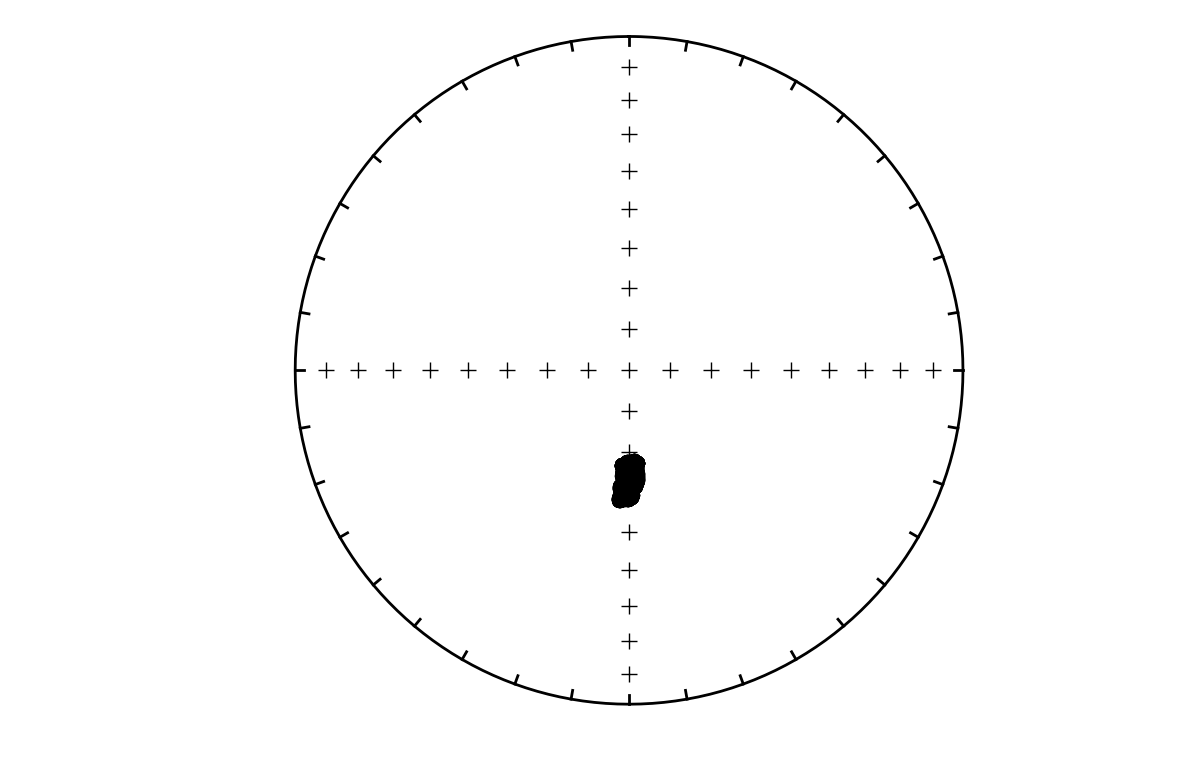

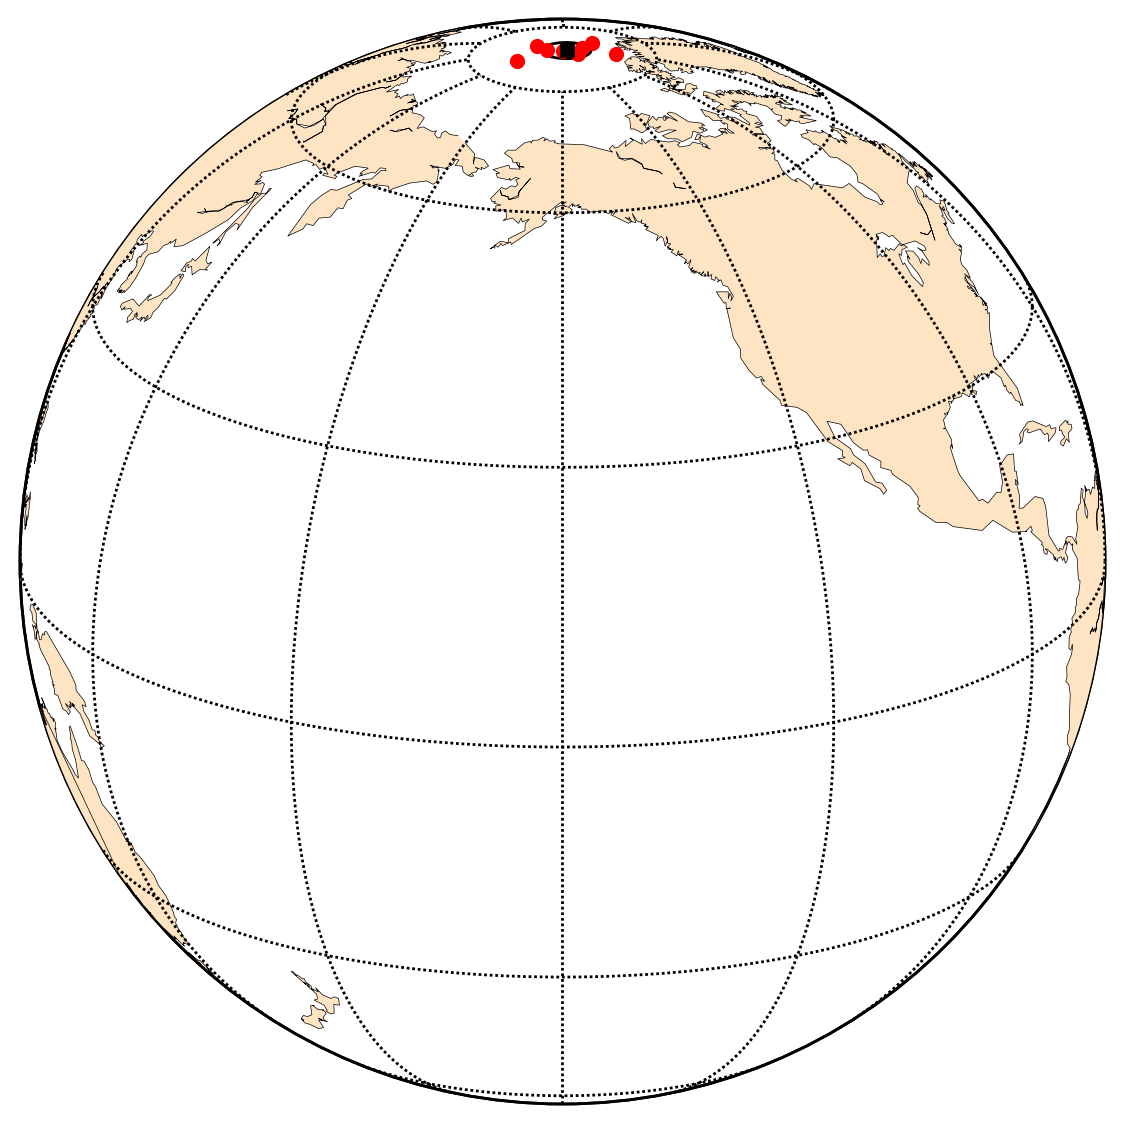

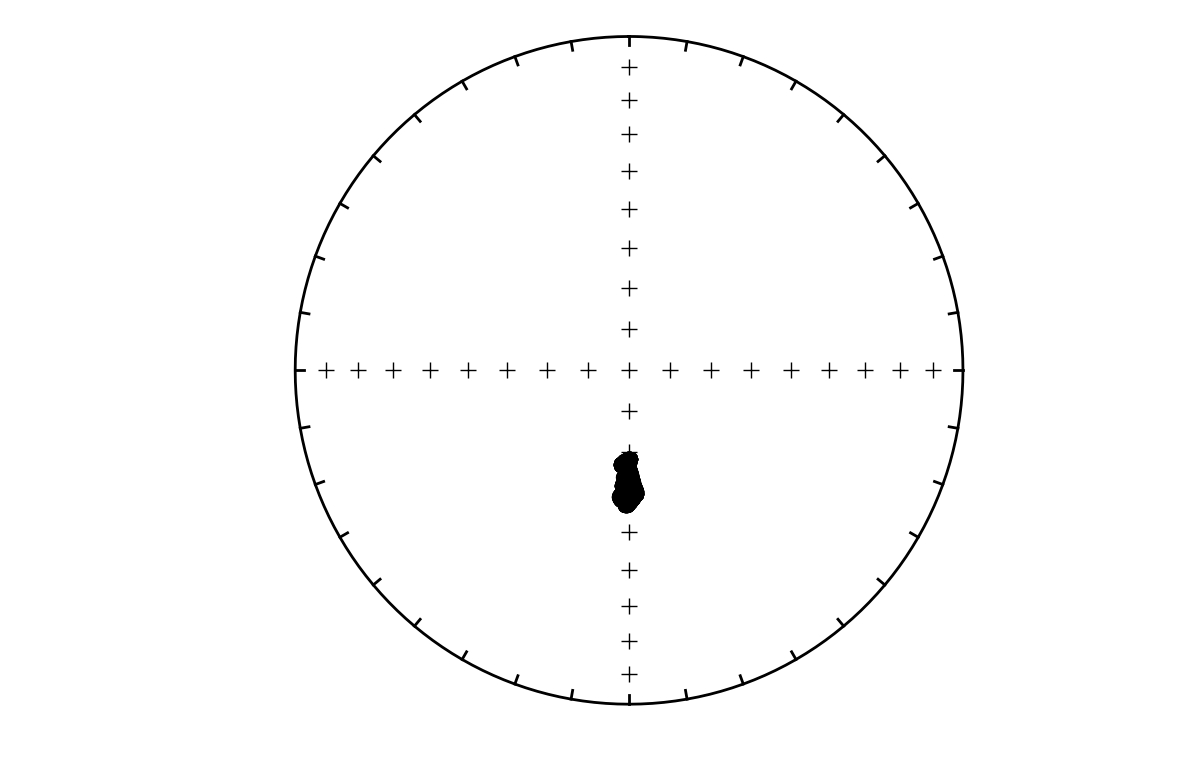

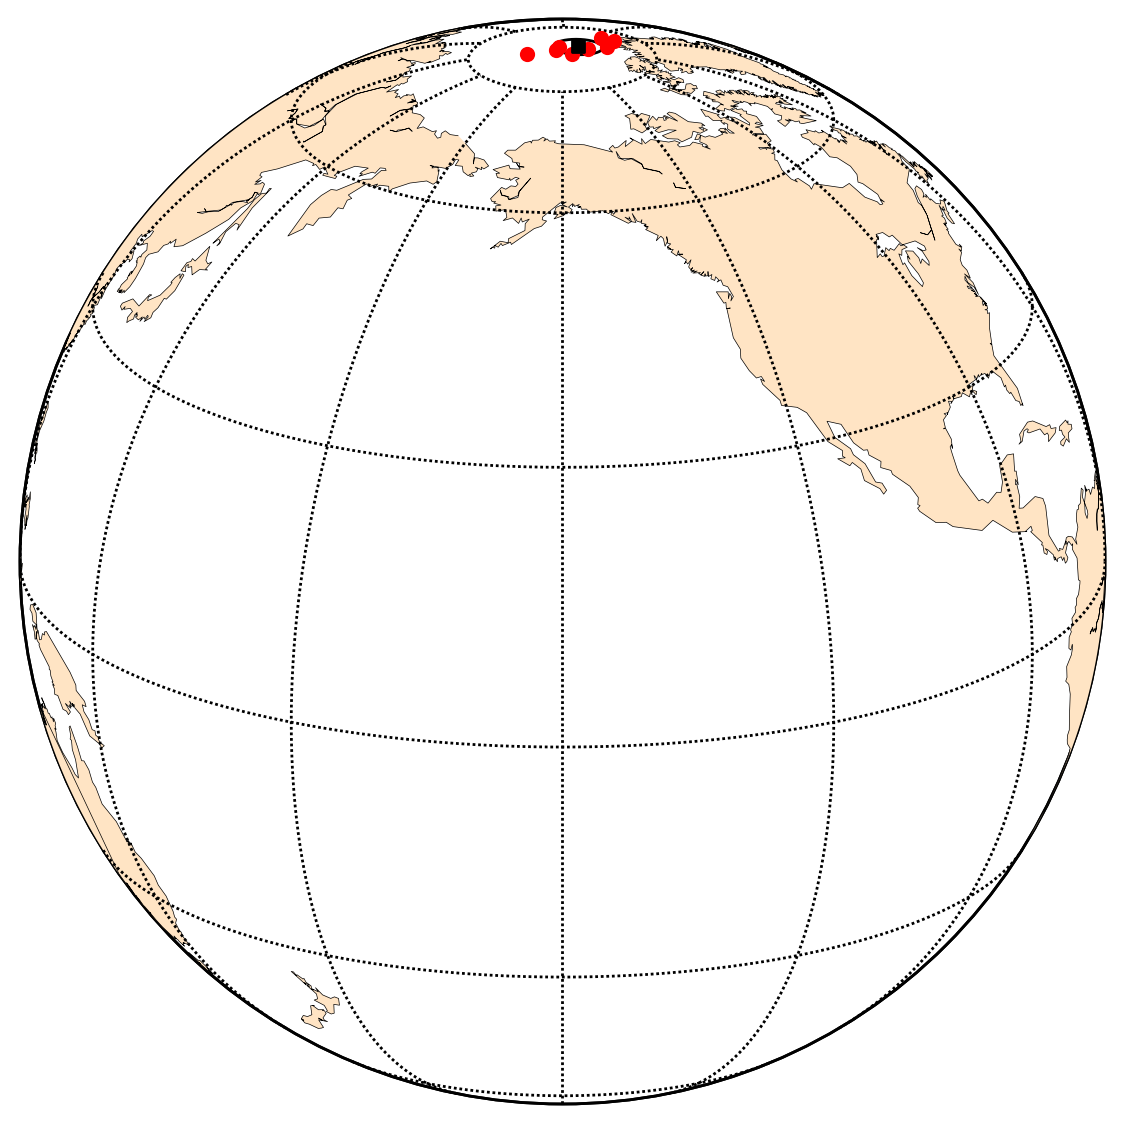

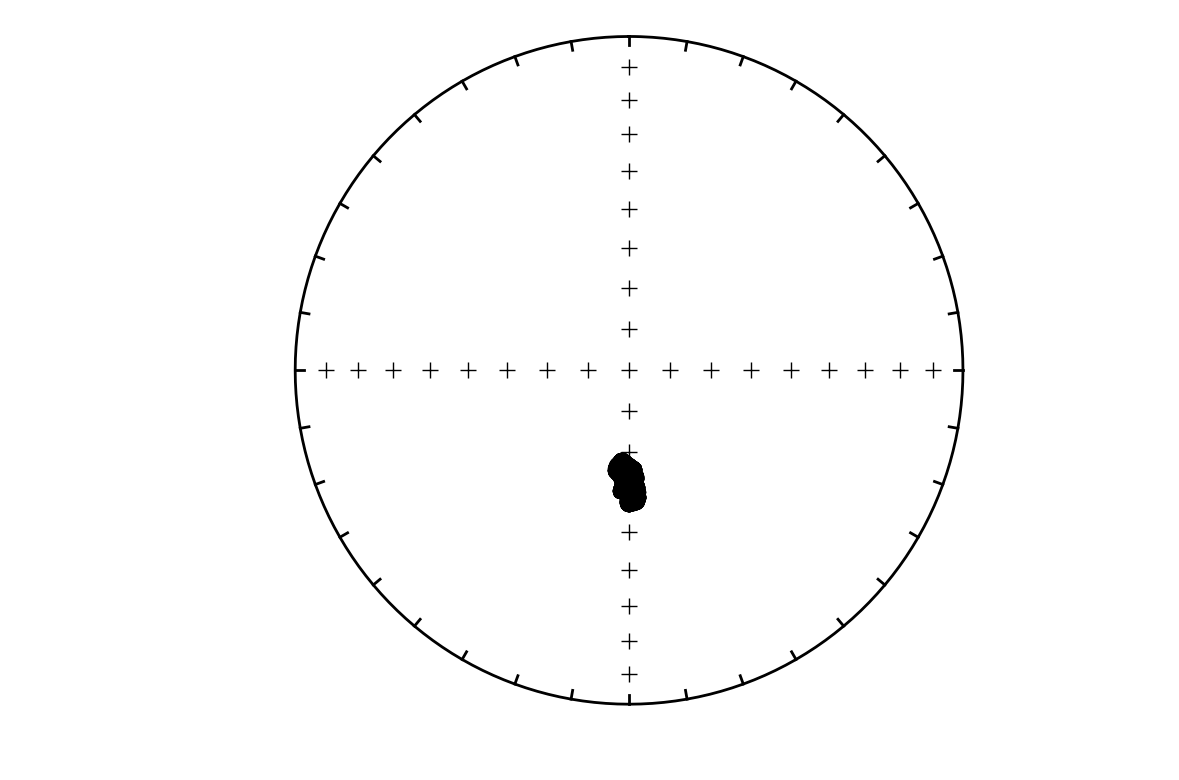

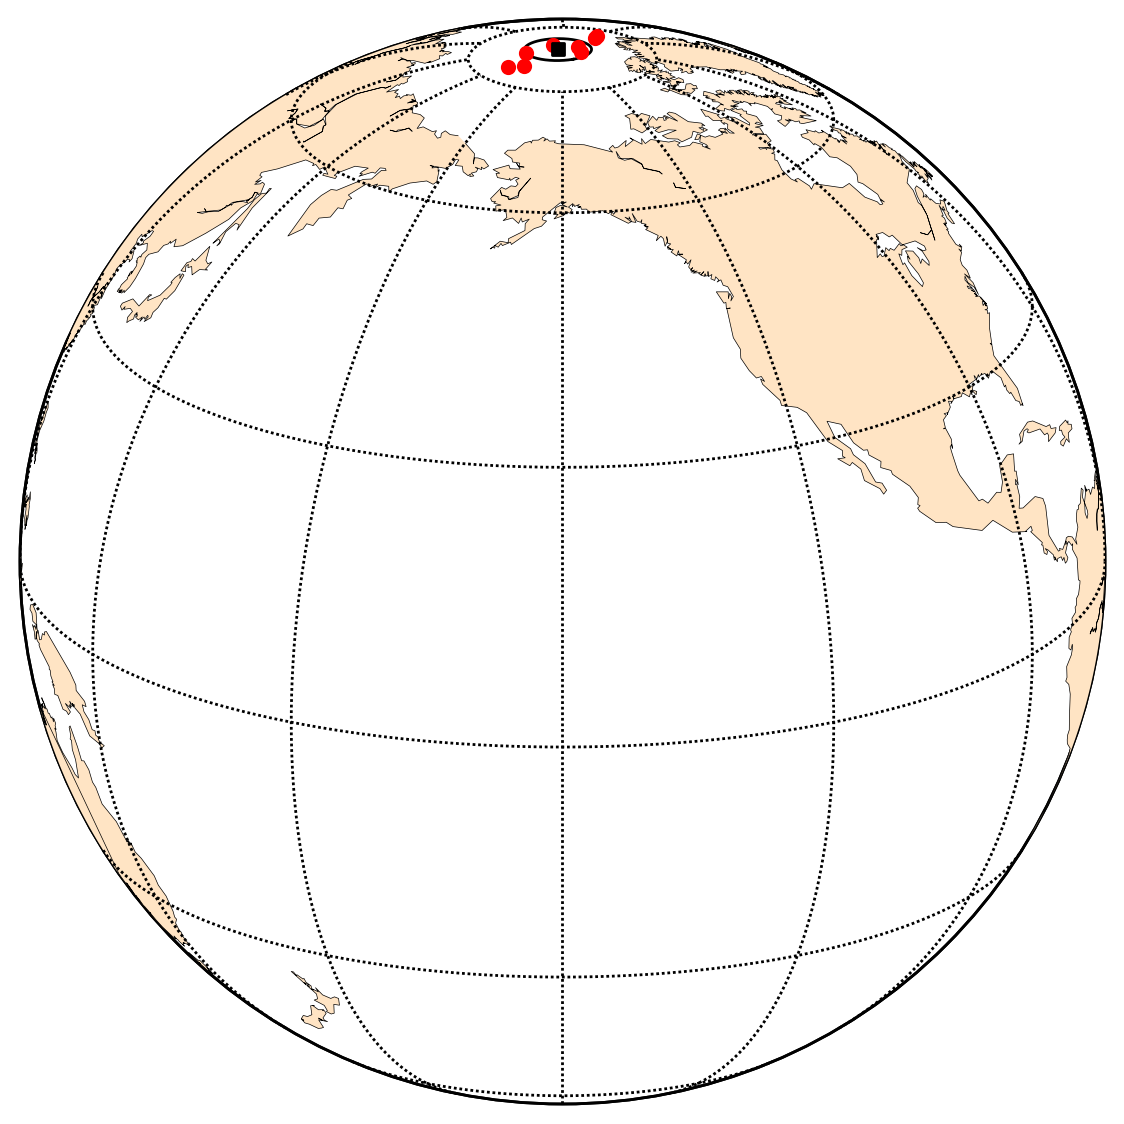

In [43]:
for lon in range(0, 380, 30):
    lat = -45

    plt.figure(1)
    ipmag.plot_net(1)
    dec_list = []
    inc_list = []
    lat_list = []
    lon_list = []
    for i in range(len(gauss_coef)):
        g_coefs = list(gauss_coef.ix[i, ['g1_0', 'g1_1', 'h1_1', 'g2_0', 'g2_1', 'h2_1', 'g2_2', 'h2_2', 'g3_0', 'g3_1', 'h3_1', 'g3_2', 'h3_2', 'g3_3', 'h3_3']])
        block = list(pmag.getvec(g_coefs,lat, lon))
        ipmag.plot_di(block[0], block[1])
        dec_list.append(block[0])
        inc_list.append(block[1])
        lat_list.append(lat)
        lon_list.append(lon)
    plt.show()

    dirs_df = pd.DataFrame(data={'dec':dec_list, 'inc':inc_list, 'lat':lat_list, 'lon':lon_list},columns=['dec', 'inc', 'lat', 'lon'])
    ipmag.vgp_calc(dirs_df, site_lat='lat', site_lon='lon', dec_tc='dec', inc_tc='inc')
    #simulate 8 samples from distribution
    sampled_dirs_dec = []
    sampled_dirs_inc = []
    sampled_dirs_lon = []
    sampled_dirs_lat = []
    for j in range(8):
        if j==0:
            rand_index = np.random.randint(0, len(gauss_coef)//8)
        else:
            rand_index = np.random.randint(j*len(gauss_coef)//8, (j+1)*len(gauss_coef)//8)
        sampled_dirs_dec.append(dirs_df['dec'].tolist()[rand_index])
        sampled_dirs_inc.append(dirs_df['inc'].tolist()[rand_index])
        sampled_dirs_lon.append(dirs_df['vgp_lon_rev'].tolist()[rand_index])
        sampled_dirs_lat.append(dirs_df['vgp_lat_rev'].tolist()[rand_index])

    m = pole_figure_appearance(center_lat=20, center_lon=-150)

    actual_pole = ipmag.fisher_mean(dirs_df['vgp_lon_rev'].tolist(), dirs_df['vgp_lat_rev'].tolist())

    mean_pole = ipmag.fisher_mean(sampled_dirs_lon, sampled_dirs_lat)
    # ipmag.plot_vgp(m,dirs_df['vgp_lon_rev'].tolist(),dirs_df['vgp_lat_rev'].tolist())
    ipmag.plot_vgp(m,sampled_dirs_lon, sampled_dirs_lat, color='r')
    ipmag.plot_pole(m, mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'], marker='s')
    m.scatter(lon, lat, latlon=True)
    plt.show()

    vgps = vgps.append(pd.Series(data = {'dec':sampled_dirs_dec, 'inc':sampled_dirs_inc, 
                                  'site_lat':lat, 'site_lon':lon, 
                                  'vgp_lat':sampled_dirs_lat, 'vgp_lon':sampled_dirs_lon}), ignore_index=True)
    mean_poles = mean_poles.append(pd.Series(data = {'site_lat':lat, 'site_lon':lon, 
                                 'mean_pole_lat':mean_pole['inc'], 
                                 'mean_pole_lon':mean_pole['dec'], 
                                 'mean_pole_A95':mean_pole['alpha95'],
                                 'mean_pole_k':mean_pole['k'],
                                 'actual_pole_lat':actual_pole['inc'], 
                                 'actual_pole_lon':actual_pole['dec']}), ignore_index=True)
    mean_poles.to_csv('mean_poles.csv')
    vgps.to_csv('VGPs.csv')

In [33]:
mean_poles

site_lat  site_lon  mean_pole_lat  mean_pole_lon  mean_pole_A95  \
0      90.0     180.0      88.513487     196.505327       1.732889   
1      90.0     180.0      88.628490     183.222663       2.185026   
2     -90.0     180.0      87.311757     142.864856       1.662081   
3     -60.0     180.0      87.016921     141.423857       1.920043   
4     -30.0     180.0      87.818098     172.076865       2.540111   
5       0.0     180.0      88.892272     120.464735       2.404197   
6      30.0     180.0      89.101397     303.591831       3.188090   
7      60.0     180.0      88.288320       0.013300       2.576409   
8      90.0     180.0      88.311020     160.388778       1.924371   
9     -45.0     180.0      87.660807     153.611862       1.935540   

   actual_pole_lat  actual_pole_lon  mean_pole_k  
0        88.335327       192.526064          NaN  
1        88.335327       192.526064          NaN  
2        88.069444       138.446912          NaN  
3        87.469063       149.814195          NaN  
4        87.997381       156.207445          NaN  
5        89.264108       163.761151          NaN  
6        89.405384       329.364360          NaN  
7        88.556606       340.775471          NaN  
8        88.335327       192.526064          NaN  
9        87.504921       154.419651   820.028386

In [34]:
total_pole_quant = by_pole.dipole.mean() + by_pole.quadrupole.mean() + by_pole.octupole.mean()
G2_frac = by_pole.quadrupole.mean()/total_pole_quant
G3_frac = by_pole.octupole.mean()/total_pole_quant

In [35]:
G3_frac

0.030855273681676669

In [36]:
tk03_lat0 = ipmag.tk03(8, G2=G2_frac, G3=G3_frac)

In [38]:
tk03_vgps = pd.DataFrame(columns=['dec', 'inc', 'site_lat', 'site_lon'])
tk03_vgps.dec = ipmag.unpack_di_block(tk03_lat0)[0]
tk03_vgps.inc = ipmag.unpack_di_block(tk03_lat0)[1]
tk03_vgps.site_lat = [0.]*8
tk03_vgps.site_lon = [0.]*8

In [39]:
ipmag.vgp_calc(tk03_vgps, dec_tc='dec', inc_tc='inc')

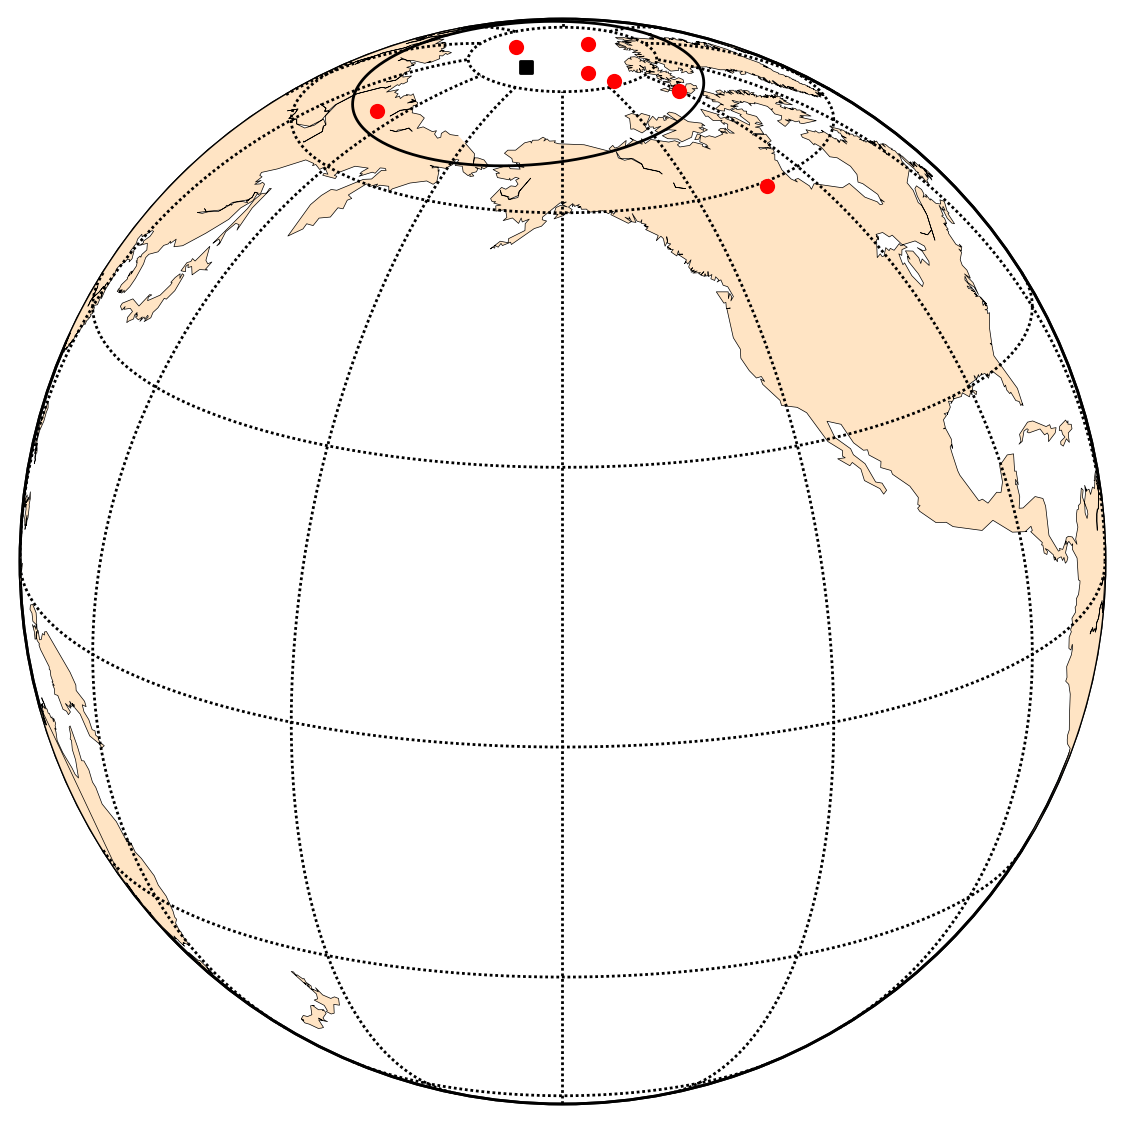

In [41]:
m = pole_figure_appearance(center_lat=20, center_lon=-150)
mean_pole = ipmag.fisher_mean(tk03_vgps.vgp_lon.tolist(), tk03_vgps.vgp_lat.tolist())
ipmag.plot_vgp(m,tk03_vgps.vgp_lon.tolist(),  tk03_vgps.vgp_lat.tolist(), color='r')
ipmag.plot_pole(m, mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'], marker='s')
# m.scatter(lon, lat, latlon=True)
plt.show()

KeyboardInterrupt: 

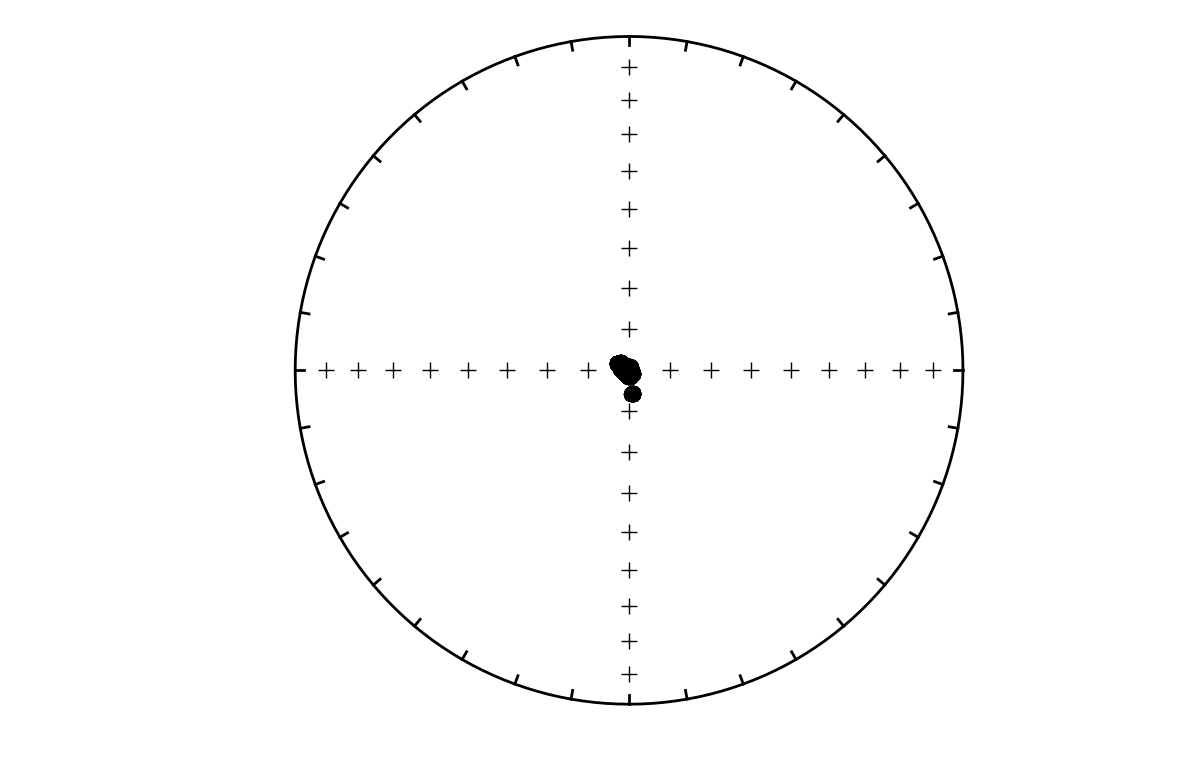

In [42]:
plt.figure(1)
ipmag.plot_net(1)
dec_list = []
inc_list = []
lat_list = []
lon_list = []
lon=0
for lat in range(-90, 100, 10):
    for i in range(len(gauss_coef)):
        time_step = list(gauss_coef.ix[i, ['g1_0', 'g1_1', 'h1_1', 'g2_0', 'g2_1', 'h2_1', 'g2_2', 'h2_2', 'g3_0', 'g3_1', 'h3_1', 'g3_2', 'h3_2', 'g3_3', 'h3_3']]*1000)
        block = list(pmag.getvec(time_step,lat, lon))
        ipmag.plot_di(block[0], block[1])
        dec_list.append(block[0])
        inc_list.append(block[1])
        lat_list.append(lat)
        lon_list.append(lon)
plt.show()

In [ ]:
mean_poles.to_csv('mean_poles.csv')
vgps.to_csv('VGPs.csv')

In [ ]:
dirs_df = pd.DataFrame(data={'dec':dec_list, 'inc':inc_list, 'lat':lat_list, 'lon':lon_list} ,columns=['dec', 'inc', 'lat', 'lon'])

In [ ]:
ipmag.vgp_calc(dirs_df, site_lat='lat', site_lon='lon', dec_tc='dec', inc_tc='inc')

In [ ]:
#simulate 8 samples from distribution
sampled_dirs_lon = []
sampled_dirs_lat = []
for j in range(8):
    rand_index = np.random.randint(0, len(gauss_coef))
    sampled_dirs_lon.append(dirs_df['vgp_lon_rev'].tolist()[rand_index])
    sampled_dirs_lat.append(dirs_df['vgp_lat_rev'].tolist()[rand_index])

In [ ]:
m = pole_figure_appearance(center_lat=20, center_lon=-150)

mean_pole = ipmag.fisher_mean(sampled_dirs_lon, sampled_dirs_lat)
# ipmag.plot_vgp(m,dirs_df['vgp_lon_rev'].tolist(),dirs_df['vgp_lat_rev'].tolist())
ipmag.plot_vgp(m,sampled_dirs_lon, sampled_dirs_lat, color='r')
ipmag.plot_pole(m, mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'], marker='s')
m.scatter(lon, lat, latlon=True)
plt.show()

In [ ]:
m = pole_figure_appearance(center_lat=20, center_lon=-150)

mean_pole = ipmag.fisher_mean(sampled_dirs_lon, sampled_dirs_lat)
# ipmag.plot_vgp(m,dirs_df['vgp_lon_rev'].tolist(),dirs_df['vgp_lat_rev'].tolist())
ipmag.plot_vgp(m,sampled_dirs_lon, sampled_dirs_lat, color='r')
ipmag.plot_pole(m, mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'], marker='s')
m.scatter(lon, lat, latlon=True)
plt.show()